<a href="https://colab.research.google.com/github/miquelyosafat/Text-Clustering-Pilpres2024/blob/main/SKRIPSI_MIGUEL_TEXT_CLUSTERING_FINAL_002.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ***DATASET PILPRES2024***

In [1]:
import pandas as pd

# data anies, ganjar, dan prabowo digabung menjadi 1 dataset
csv_files = ['dataPilpres2024-001.csv', 'dataPilpres2024-002.csv']

# Buat sebuah list kosong untuk menyimpan DataFrame dari setiap file CSV
dataframes = []

# Loop melalui setiap file CSV
for file in csv_files:
    # Baca file CSV menjadi DataFrame
    df = pd.read_csv(file)
    # Tambahkan DataFrame ke dalam list
    dataframes.append(df)

# Gabungkan DataFrame dalam list menjadi satu DataFrame tunggal
combined_df = pd.concat(dataframes, ignore_index=True)

# Filter data yang double, ambil data pertama
filtered_df = combined_df.drop_duplicates(keep='first')

# Cetak DataFrame hasil penggabungan
print(filtered_df)

# Simpan DataFrame hasil penggabungan menjadi file CSV
filtered_df.to_csv('data-Pilpres2024#002.csv', index=False)


                          created_at            id        id_str  \
0     Sun Apr 30 12:03:09 +0000 2023  1.652645e+18  1.652645e+18   
1     Sun Apr 30 12:10:37 +0000 2023  1.652647e+18  1.652647e+18   
2     Sun Apr 30 13:47:04 +0000 2023  1.652671e+18  1.652671e+18   
3     Sun Apr 30 09:31:45 +0000 2023  1.652607e+18  1.652607e+18   
4     Sun Apr 30 13:48:06 +0000 2023  1.652671e+18  1.652671e+18   
...                              ...           ...           ...   
3966  Sun Jan 01 11:50:27 +0000 2023           NaN           NaN   
3967  Sun Jan 01 07:20:20 +0000 2023           NaN           NaN   
3968  Sun Jan 01 00:25:47 +0000 2023           NaN           NaN   
3969  Sun Jan 01 05:27:36 +0000 2023           NaN           NaN   
3970  Sun Jan 01 03:23:25 +0000 2023           NaN           NaN   

                                              full_text quote_count  \
0               Bismillah, Pak @ganjarpranowo utk RI-1🙏           1   
1     Bismilah Ganjar Pranowo (Tugiman) s

# ***IMPORT LIBRARIES***

In [2]:
# Import libraries
!pip install nltk
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
import nltk
import string
import re
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

# ***LOAD DATASET***

In [3]:
import pandas as pd
# Load dataset
def load_data():
    data = pd.read_csv('data-Pilpres2024#002.csv')
    return data

data = load_data()
data.head(4)

created_at            id        id_str  \
0  Sun Apr 30 12:03:09 +0000 2023  1.652645e+18  1.652645e+18   
1  Sun Apr 30 12:10:37 +0000 2023  1.652647e+18  1.652647e+18   
2  Sun Apr 30 13:47:04 +0000 2023  1.652671e+18  1.652671e+18   
3  Sun Apr 30 09:31:45 +0000 2023  1.652607e+18  1.652607e+18   

                                           full_text quote_count reply_count  \
0            Bismillah, Pak @ganjarpranowo utk RI-1🙏           1           1   
1  Bismilah Ganjar Pranowo (Tugiman) semoga tdk j...           0           1   
2  @KeroZaok Kata siapa pak Prabowo akan kalah la...           0           0   
3  Ganjar Pranowo adalah pemersatu antara Partai ...           0           0   

   retweet_count  favorite_count  geo lang          user_id_str  \
0            3.0             5.0  NaN   in   727894995454152704   
1            1.0             2.0  NaN   in  1081371921864830976   
2            0.0             0.0  NaN   in  1648003679566577666   
3            0.0             0.0  NaN   in            786117098   

       conversation_id  conversation_id_str  \
0  1652644759553581000         1.652645e+18   
1  1652646637154762800         1.652647e+18   
2  1649246726803587000         1.649247e+18   
3  1652606657669779500         1.652607e+18   

                                   media_url_https media_type  \
0                                              NaN        NaN   
1                                              NaN        NaN   
2                                              NaN        NaN   
3  https://pbs.twimg.com/media/Fu88_wtaMAAI1ee.jpg      photo   

          username Unnamed: 16 Unnamed: 17 tweet  
0     mistercebong         NaN         NaN   NaN  
1    TerunaPertiwi         NaN         NaN   NaN  
2     FransiszcusD         NaN         NaN   NaN  
3  Vianita_Nawaksa         NaN         NaN   NaN

In [5]:
#ubah dataframe sesuai column yang dibutuhkan
df  = pd.DataFrame(data[['created_at','username','reply_count','retweet_count','favorite_count','full_text']])
df.head(4)

created_at         username reply_count  retweet_count  \
0  Sun Apr 30 12:03:09 +0000 2023     mistercebong           1            3.0   
1  Sun Apr 30 12:10:37 +0000 2023    TerunaPertiwi           1            1.0   
2  Sun Apr 30 13:47:04 +0000 2023     FransiszcusD           0            0.0   
3  Sun Apr 30 09:31:45 +0000 2023  Vianita_Nawaksa           0            0.0   

   favorite_count                                          full_text  
0             5.0            Bismillah, Pak @ganjarpranowo utk RI-1🙏  
1             2.0  Bismilah Ganjar Pranowo (Tugiman) semoga tdk j...  
2             0.0  @KeroZaok Kata siapa pak Prabowo akan kalah la...  
3             0.0  Ganjar Pranowo adalah pemersatu antara Partai ...

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3966 entries, 0 to 3965
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   created_at      3965 non-null   object 
 1   username        3958 non-null   object 
 2   reply_count     3965 non-null   object 
 3   retweet_count   3965 non-null   float64
 4   favorite_count  3965 non-null   float64
 5   full_text       1988 non-null   object 
dtypes: float64(2), object(4)
memory usage: 186.0+ KB


# ***CLEASING***

In [8]:
import re
import string

# Cleansing data
def remove_URL(tweet):
    url = re.compile(r'https?://\S+|www\.\S+')
    return url.sub(r'', tweet)

def remove_html(tweet):
    html = re.compile(r'<.*?>')
    return html.sub(r'', tweet)

def remove_emoji(tweet):
    emoji_pattern = re.compile("["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', tweet)

def remove_angka(tweet):
    # Remove angka
    tweet = re.sub('[0-9]+', '', tweet)

    # Remove stock market tickers like $GE
    tweet = re.sub(r'\$\w*', '', tweet)

    # Remove old style retweet text "RT"
    tweet = re.sub(r'^RT[\s]+', '', tweet)

    # Remove hashtags
    # Only removing the hash # sign from the word
    tweet = re.sub(r'#', '', tweet)
    return tweet

def remove_punct(tweets):
    translator = str.maketrans('', '', string.punctuation)
    return tweets.translate(translator)

# Mengonversi tipe data kolom 'full_text' menjadi string
df['full_text'] = df['full_text'].astype(str)

# Penerapan fungsi-fungsi pembersihan pada kolom 'full_text'
df['cleansing'] = df['full_text'].apply(lambda x: remove_URL(x))
df['cleansing'] = df['cleansing'].apply(lambda x: remove_html(x))
df['cleansing'] = df['cleansing'].apply(lambda x: remove_emoji(x))
df['cleansing'] = df['cleansing'].apply(lambda x: remove_punct(x))
df['cleansing'] = df['cleansing'].apply(lambda x: remove_angka(x))

df.head(2)


created_at       username reply_count  retweet_count  \
0  Sun Apr 30 12:03:09 +0000 2023   mistercebong           1            3.0   
1  Sun Apr 30 12:10:37 +0000 2023  TerunaPertiwi           1            1.0   

   favorite_count                                          full_text  \
0             5.0            Bismillah, Pak @ganjarpranowo utk RI-1🙏   
1             2.0  Bismilah Ganjar Pranowo (Tugiman) semoga tdk j...   

                                           cleansing  
0                 Bismillah Pak ganjarpranowo utk RI  
1  Bismilah Ganjar Pranowo Tugiman semoga tdk jad...

# ***TOKENIZATION DAN CASE FOLDING***

In [9]:
# Tokenization dan Case Folding
df['Tokenization and Case Folding'] = df['cleansing'].apply(lambda x: x.lower().split())

df.head(2)

created_at       username reply_count  retweet_count  \
0  Sun Apr 30 12:03:09 +0000 2023   mistercebong           1            3.0   
1  Sun Apr 30 12:10:37 +0000 2023  TerunaPertiwi           1            1.0   

   favorite_count                                          full_text  \
0             5.0            Bismillah, Pak @ganjarpranowo utk RI-1🙏   
1             2.0  Bismilah Ganjar Pranowo (Tugiman) semoga tdk j...   

                                           cleansing  \
0                 Bismillah Pak ganjarpranowo utk RI   
1  Bismilah Ganjar Pranowo Tugiman semoga tdk jad...   

                       Tokenization and Case Folding  
0           [bismillah, pak, ganjarpranowo, utk, ri]  
1  [bismilah, ganjar, pranowo, tugiman, semoga, t...

# ***STOPWORD REMOVAL***

In [10]:
# Stopword Removal
nltk.download('stopwords')
stop_words = stopwords.words('indonesian')
def remove_stopwords(text):
    return [word for word in text if word not in stop_words]

df['Filtering/ stopword removal'] = df['Tokenization and Case Folding'].apply(lambda x: remove_stopwords(x))

df.head(2)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


created_at       username reply_count  retweet_count  \
0  Sun Apr 30 12:03:09 +0000 2023   mistercebong           1            3.0   
1  Sun Apr 30 12:10:37 +0000 2023  TerunaPertiwi           1            1.0   

   favorite_count                                          full_text  \
0             5.0            Bismillah, Pak @ganjarpranowo utk RI-1🙏   
1             2.0  Bismilah Ganjar Pranowo (Tugiman) semoga tdk j...   

                                           cleansing  \
0                 Bismillah Pak ganjarpranowo utk RI   
1  Bismilah Ganjar Pranowo Tugiman semoga tdk jad...   

                       Tokenization and Case Folding  \
0           [bismillah, pak, ganjarpranowo, utk, ri]   
1  [bismilah, ganjar, pranowo, tugiman, semoga, t...   

                         Filtering/ stopword removal  
0                [bismillah, ganjarpranowo, utk, ri]  
1  [bismilah, ganjar, pranowo, tugiman, semoga, t...

# ***STEMMING***

In [11]:
!pip install Sastrawi

from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from nltk.stem import PorterStemmer
from nltk.stem.snowball import SnowballStemmer

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.7/209.7 kB 17.0 MB/s eta 0:00:00


In [12]:
# membuat stemmer
factory = StemmerFactory()
stemmer = factory.create_stemmer()

# mendefinisikan fungsi untuk membendung teks
def stem_text(text):
    return [stemmer.stem(word) for word in text]

# terapkan stemming ke kolom 'Tweet' dan buat kolom baru 'stemmed_tweet'
df['Stemming data'] = df['Filtering/ stopword removal'].apply(lambda x: ' '.join(stem_text(x)))

# melihat 2 baris pertama dari data
df.head(2)

created_at       username reply_count  retweet_count  \
0  Sun Apr 30 12:03:09 +0000 2023   mistercebong           1            3.0   
1  Sun Apr 30 12:10:37 +0000 2023  TerunaPertiwi           1            1.0   

   favorite_count                                          full_text  \
0             5.0            Bismillah, Pak @ganjarpranowo utk RI-1🙏   
1             2.0  Bismilah Ganjar Pranowo (Tugiman) semoga tdk j...   

                                           cleansing  \
0                 Bismillah Pak ganjarpranowo utk RI   
1  Bismilah Ganjar Pranowo Tugiman semoga tdk jad...   

                       Tokenization and Case Folding  \
0           [bismillah, pak, ganjarpranowo, utk, ri]   
1  [bismilah, ganjar, pranowo, tugiman, semoga, t...   

                         Filtering/ stopword removal  \
0                [bismillah, ganjarpranowo, utk, ri]   
1  [bismilah, ganjar, pranowo, tugiman, semoga, t...   

                                       Stemming data  
0                     bismillah ganjarpranowo utk ri  
1  bismilah ganjar pranowo tugiman moga tdk presi...

In [13]:
df.drop_duplicates(subset ="Stemming data", keep = 'first', inplace = True)
df.head(2)

created_at       username reply_count  retweet_count  \
0  Sun Apr 30 12:03:09 +0000 2023   mistercebong           1            3.0   
1  Sun Apr 30 12:10:37 +0000 2023  TerunaPertiwi           1            1.0   

   favorite_count                                          full_text  \
0             5.0            Bismillah, Pak @ganjarpranowo utk RI-1🙏   
1             2.0  Bismilah Ganjar Pranowo (Tugiman) semoga tdk j...   

                                           cleansing  \
0                 Bismillah Pak ganjarpranowo utk RI   
1  Bismilah Ganjar Pranowo Tugiman semoga tdk jad...   

                       Tokenization and Case Folding  \
0           [bismillah, pak, ganjarpranowo, utk, ri]   
1  [bismilah, ganjar, pranowo, tugiman, semoga, t...   

                         Filtering/ stopword removal  \
0                [bismillah, ganjarpranowo, utk, ri]   
1  [bismilah, ganjar, pranowo, tugiman, semoga, t...   

                                       Stemming data  
0                     bismillah ganjarpranowo utk ri  
1  bismilah ganjar pranowo tugiman moga tdk presi...

In [14]:
df.to_csv('Preprocessing-Data-Pilpres-2024#002.csv',encoding='utf8', index=False)

# ***HASIL PREPROCESSING DATA***

In [15]:
def load_data():
    data = pd.read_csv('Preprocessing-Data-Pilpres-2024#002.csv')
    return data

tweet_df = load_data()
tweet_df.head(2)

created_at       username reply_count  retweet_count  \
0  Sun Apr 30 12:03:09 +0000 2023   mistercebong           1            3.0   
1  Sun Apr 30 12:10:37 +0000 2023  TerunaPertiwi           1            1.0   

   favorite_count                                          full_text  \
0             5.0            Bismillah, Pak @ganjarpranowo utk RI-1🙏   
1             2.0  Bismilah Ganjar Pranowo (Tugiman) semoga tdk j...   

                                           cleansing  \
0                 Bismillah Pak ganjarpranowo utk RI   
1  Bismilah Ganjar Pranowo Tugiman semoga tdk jad...   

                       Tokenization and Case Folding  \
0  ['bismillah', 'pak', 'ganjarpranowo', 'utk', '...   
1  ['bismilah', 'ganjar', 'pranowo', 'tugiman', '...   

                         Filtering/ stopword removal  \
0        ['bismillah', 'ganjarpranowo', 'utk', 'ri']   
1  ['bismilah', 'ganjar', 'pranowo', 'tugiman', '...   

                                       Stemming data  
0                     bismillah ganjarpranowo utk ri  
1  bismilah ganjar pranowo tugiman moga tdk presi...

In [16]:
tweet_df.drop(tweet_df.columns[[5,6,7,8]], axis = 1, inplace = True)
tweet_df.head(4)

created_at         username reply_count  retweet_count  \
0  Sun Apr 30 12:03:09 +0000 2023     mistercebong           1            3.0   
1  Sun Apr 30 12:10:37 +0000 2023    TerunaPertiwi           1            1.0   
2  Sun Apr 30 13:47:04 +0000 2023     FransiszcusD           0            0.0   
3  Sun Apr 30 09:31:45 +0000 2023  Vianita_Nawaksa           0            0.0   

   favorite_count                                      Stemming data  
0             5.0                     bismillah ganjarpranowo utk ri  
1             2.0  bismilah ganjar pranowo tugiman moga tdk presi...  
2             0.0  kerozaok prabowo kalah pilpres rakyat indonesi...  
3             0.0  ganjar pranowo satu partai demokrasi indonesia...

In [17]:
#ubah dataframe sesuai column yang dibutuhkan
df  = pd.DataFrame(tweet_df[['created_at','username','reply_count','retweet_count','favorite_count','Stemming data']])
df.head(4)

created_at         username reply_count  retweet_count  \
0  Sun Apr 30 12:03:09 +0000 2023     mistercebong           1            3.0   
1  Sun Apr 30 12:10:37 +0000 2023    TerunaPertiwi           1            1.0   
2  Sun Apr 30 13:47:04 +0000 2023     FransiszcusD           0            0.0   
3  Sun Apr 30 09:31:45 +0000 2023  Vianita_Nawaksa           0            0.0   

   favorite_count                                      Stemming data  
0             5.0                     bismillah ganjarpranowo utk ri  
1             2.0  bismilah ganjar pranowo tugiman moga tdk presi...  
2             0.0  kerozaok prabowo kalah pilpres rakyat indonesi...  
3             0.0  ganjar pranowo satu partai demokrasi indonesia...

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1768 entries, 0 to 1767
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   created_at      1767 non-null   object 
 1   username        1761 non-null   object 
 2   reply_count     1767 non-null   object 
 3   retweet_count   1767 non-null   float64
 4   favorite_count  1767 non-null   float64
 5   Stemming data   1766 non-null   object 
dtypes: float64(2), object(4)
memory usage: 83.0+ KB


In [19]:
tweet_df.to_csv('Hasil-Preprocessing-Data-Pilpres2024#002.csv',encoding='utf8', index=False)

# ***WORDCLOUD SETELAH DATA DI PREPROCESSING***

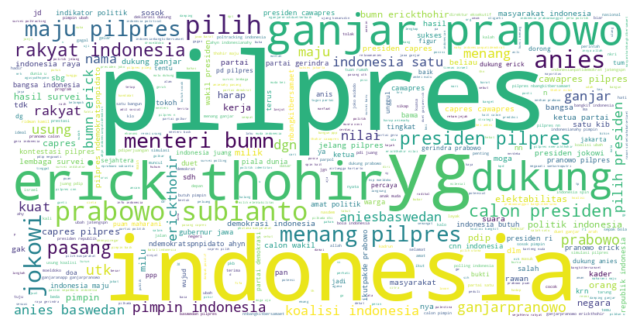

In [21]:
import pandas as pd
import numpy as np
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt

# Membaca dataset
df = pd.read_csv('Hasil-Preprocessing-Data-Pilpres2024#002.csv')

df['Stemming data'] = df['Stemming data'].fillna('')

# Menggabungkan semua tweet menjadi satu string
data = ' '.join(df['Stemming data'].tolist())

# Menghilangkan kata-kata yang tidak diinginkan
stopwords = set(STOPWORDS)
stopwords.update(['https', 'co', 'RT', '...', 'amp'])

# Membuat objek WordCloud
wc = WordCloud(stopwords=stopwords, background_color="white", max_words=2000, width=800, height=400)

# Menghasilkan WordCloud dari string tweet
wc.generate(data)

# Menampilkan WordCloud
plt.figure(figsize=(8, 10))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

# ***WORDCLOUD PILPRES 2024***

In [ ]:
import pandas as pd
import numpy as np
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt

# Membaca dataset
df = pd.read_csv('data-GanjarPranowo-Pilpres2024.csv')

# Menggabungkan semua teks dari kolom 'Tweet' menjadi satu string
text = ' '.join(df['Tweet'].astype(str).values)

# Menghilangkan kata-kata yang tidak diinginkan
stopwords = set(STOPWORDS)
stopwords.update(['https', 'co', 'RT', '...', 'amp'])

# Membuat objek WordCloud
wc = WordCloud(stopwords=stopwords, background_color="white", max_words=2000, width=800, height=400)

# Menghasilkan WordCloud dari string tweet
wc.generate(text)

# Menampilkan WordCloud
plt.figure(figsize=(8, 10))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")

# Menyimpan word cloud dengan resolusi tinggi dan tanpa pecah
plt.savefig('wcPrabowoSubianto.png', dpi=300, bbox_inches='tight')

plt.show()

# ***TEXT REPRESENTATION***

In [22]:
import pandas as pd
# Load dataset
def load_data():
    data = pd.read_csv('Hasil-Preprocessing-Data-Pilpres2024#002.csv')
    return data

data = load_data()
data.head(4)

created_at         username reply_count  retweet_count  \
0  Sun Apr 30 12:03:09 +0000 2023     mistercebong           1            3.0   
1  Sun Apr 30 12:10:37 +0000 2023    TerunaPertiwi           1            1.0   
2  Sun Apr 30 13:47:04 +0000 2023     FransiszcusD           0            0.0   
3  Sun Apr 30 09:31:45 +0000 2023  Vianita_Nawaksa           0            0.0   

   favorite_count                                      Stemming data  
0             5.0                     bismillah ganjarpranowo utk ri  
1             2.0  bismilah ganjar pranowo tugiman moga tdk presi...  
2             0.0  kerozaok prabowo kalah pilpres rakyat indonesi...  
3             0.0  ganjar pranowo satu partai demokrasi indonesia...

In [23]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1768 entries, 0 to 1767
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   created_at      1767 non-null   object 
 1   username        1761 non-null   object 
 2   reply_count     1767 non-null   object 
 3   retweet_count   1767 non-null   float64
 4   favorite_count  1767 non-null   float64
 5   Stemming data   1766 non-null   object 
dtypes: float64(2), object(4)
memory usage: 83.0+ KB


In [24]:
data['full_text'] = data['Stemming data'].str.replace('yg', '')
data.head(4)

created_at         username reply_count  retweet_count  \
0  Sun Apr 30 12:03:09 +0000 2023     mistercebong           1            3.0   
1  Sun Apr 30 12:10:37 +0000 2023    TerunaPertiwi           1            1.0   
2  Sun Apr 30 13:47:04 +0000 2023     FransiszcusD           0            0.0   
3  Sun Apr 30 09:31:45 +0000 2023  Vianita_Nawaksa           0            0.0   

   favorite_count                                      Stemming data  \
0             5.0                     bismillah ganjarpranowo utk ri   
1             2.0  bismilah ganjar pranowo tugiman moga tdk presi...   
2             0.0  kerozaok prabowo kalah pilpres rakyat indonesi...   
3             0.0  ganjar pranowo satu partai demokrasi indonesia...   

                                           full_text  
0                     bismillah ganjarpranowo utk ri  
1  bismilah ganjar pranowo tugiman moga tdk presi...  
2  kerozaok prabowo kalah pilpres rakyat indonesi...  
3  ganjar pranowo satu partai demokrasi indonesia...

In [26]:
#Working with the most Frequent Words:
from collections import Counter
data['full_text'] = data['full_text'].fillna('')
cnt = Counter()
for text in data["full_text"].values:
    for word in text.split():
        cnt[word] += 1
cnt.most_common(10)
temp = pd.DataFrame(cnt.most_common(10))
temp.columns=['word', 'count']
temp

word  count
0    pilpres   1739
1  indonesia   1608
2   presiden    464
3     ganjar    450
4    prabowo    398
5     dukung    398
6      erick    307
7     pimpin    305
8      pilih    293
9       maju    290

In [32]:
import matplotlib.pyplot as plt
import plotly.express as px

# Mengurutkan data berdasarkan nilai count secara descending
temp_sorted = temp.sort_values(by='count', ascending=False)

# Membuat plot menggunakan data yang telah diurutkan
fig = px.bar(temp_sorted, x="count", y="word", title='Jumlah Kata Tweet Yang Sering Muncul', orientation='h', width=800, height=700)

# Membalikkan urutan sumbu y
fig.update_yaxes(autorange="reversed")

# Menampilkan plot
fig.show()

In [33]:
data.head(10)

created_at         username reply_count  retweet_count  \
0  Sun Apr 30 12:03:09 +0000 2023     mistercebong           1            3.0   
1  Sun Apr 30 12:10:37 +0000 2023    TerunaPertiwi           1            1.0   
2  Sun Apr 30 13:47:04 +0000 2023     FransiszcusD           0            0.0   
3  Sun Apr 30 09:31:45 +0000 2023  Vianita_Nawaksa           0            0.0   
4  Sun Apr 30 13:48:06 +0000 2023     Alie_Fahnoor           1            4.0   
5  Sun Apr 30 13:39:43 +0000 2023     biruhitam_08           0            7.0   
6  Sun Apr 30 15:44:03 +0000 2023      bamantara00           0            5.0   
7  Sun Apr 30 20:15:00 +0000 2023        medcom_id           0            0.0   
8  Sun Apr 30 09:10:08 +0000 2023        Ini_ajunk           0            0.0   
9  Sun Apr 30 13:13:16 +0000 2023       AdiysSeven           0            0.0   

   favorite_count                                      Stemming data  \
0             5.0                     bismillah ganjarpranowo utk ri   
1             2.0  bismilah ganjar pranowo tugiman moga tdk presi...   
2             0.0  kerozaok prabowo kalah pilpres rakyat indonesi...   
3             0.0  ganjar pranowo satu partai demokrasi indonesia...   
4             9.0  jakarta cnn indonesia ketua partai gerindra pr...   
5             8.0  release poltracking indonesia simulasi paslon ...   
6             5.0  menteri bumn erick thohir figur cawapres elekt...   
7             1.0  partai golkar potensi gabung koalisi untun had...   
8             0.0  prabowo cawapres pilpres kantong cnn indonesia...   
9             1.0  datuakrajoangek ganjar vs prabowo jokowi ps ta...   

                                           full_text  
0                     bismillah ganjarpranowo utk ri  
1  bismilah ganjar pranowo tugiman moga tdk presi...  
2  kerozaok prabowo kalah pilpres rakyat indonesi...  
3  ganjar pranowo satu partai demokrasi indonesia...  
4  jakarta cnn indonesia ketua partai gerindra pr...  
5  release poltracking indonesia simulasi paslon ...  
6  menteri bumn erick thohir figur cawapres elekt...  
7  partai golkar potensi gabung koalisi untun had...  
8  prabowo cawapres pilpres kantong cnn indonesia...  
9  datuakrajoangek ganjar vs prabowo jokowi ps ta...

In [35]:
from sklearn.feature_extraction.text import TfidfVectorizer

data['Stemming data'] = data['Stemming data'].fillna('')

# Menggunakan TfidfVectorizer untuk representasi vektor
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(data['Stemming data'])

# Menampilkan hasil representasi vektor
print("Jumlah dokumen:", X.shape[0])
print("Jumlah fitur:", X.shape[1])
print(" ")
print("Representasi Vector:")
print(X.toarray())

Jumlah dokumen: 1768
Jumlah fitur: 6408
 
Representasi Vector:
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [36]:
tweet_df.to_csv('Hasil-TextRepresentation#002.csv',encoding='utf8', index=False)

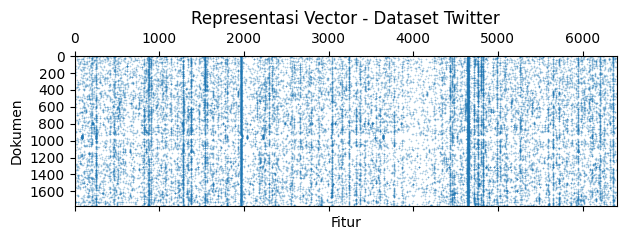

In [37]:
# Plot representasi vektor
plt.figure(figsize=(7, 4))
plt.spy(X, markersize=0.1)
plt.xlabel('Fitur')
plt.ylabel('Dokumen')
plt.title('Representasi Vector - Dataset Twitter')
plt.show()

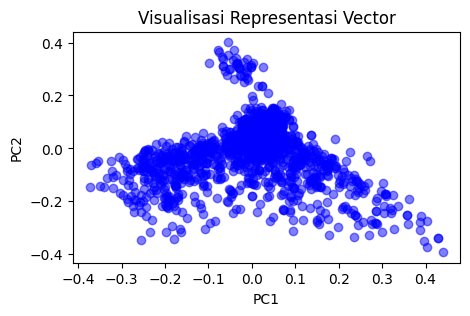

In [38]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Reduksi dimensi menggunakan PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X.toarray())

# Membuat plot
plt.figure(figsize=(5, 3))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c='b', alpha=0.5)
plt.title('Visualisasi Representasi Vector')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

# ***K-MEANS CLUSTERING***

In [39]:
from sklearn.cluster import KMeans

# Menentukan jumlah cluster terbaik menggunakan metode elbow
# Jumlah cluster maksimal yang akan dievaluasi
max_clusters = 20
inertia = []
for k in range(1, max_clusters+1):
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



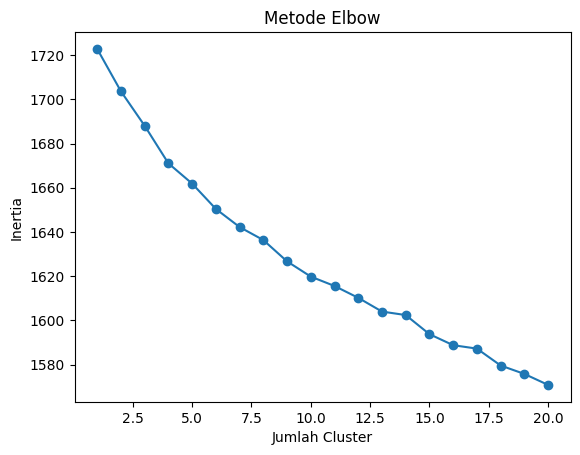

In [40]:
# Plot metode elbow
plt.plot(range(1, max_clusters+1), inertia, marker='o')
plt.title('Metode Elbow')
plt.xlabel('Jumlah Cluster')
plt.ylabel('Inertia')
plt.show()

In [43]:
from sklearn.metrics import silhouette_score

# Menghitung silhouette score untuk berbagai jumlah kluster
silhouette_scores = []
for k in range(2, 21):
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(X)
    labels = kmeans.labels_
    score = silhouette_score(X, labels)
    silhouette_scores.append(score)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will chang

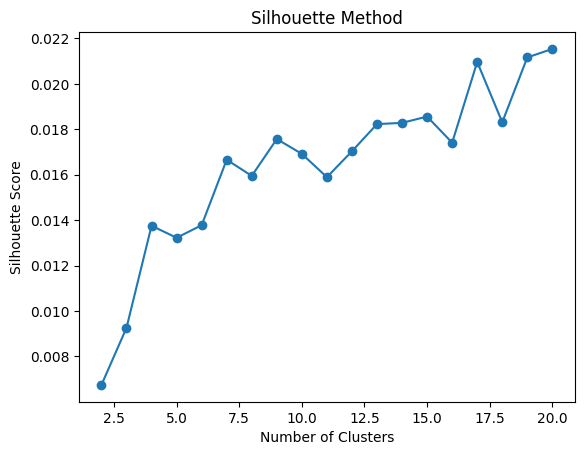

In [44]:
# Membuat plot silhouette
plt.plot(range(2, 21), silhouette_scores, marker='o')
plt.title('Silhouette Method')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.show()

In [45]:
# Melakukan clustering dengan k-means
kmeans = KMeans(n_clusters=20, max_iter=100, random_state=0)
kmeans.fit(X)

# Mendapatkan label klaster untuk setiap data
labels = kmeans.labels_

# Menambahkan kolom 'Cluster' ke DataFrame
data['Cluster'] = labels

data.head(4)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



created_at         username reply_count  retweet_count  \
0  Sun Apr 30 12:03:09 +0000 2023     mistercebong           1            3.0   
1  Sun Apr 30 12:10:37 +0000 2023    TerunaPertiwi           1            1.0   
2  Sun Apr 30 13:47:04 +0000 2023     FransiszcusD           0            0.0   
3  Sun Apr 30 09:31:45 +0000 2023  Vianita_Nawaksa           0            0.0   

   favorite_count                                      Stemming data  \
0             5.0                     bismillah ganjarpranowo utk ri   
1             2.0  bismilah ganjar pranowo tugiman moga tdk presi...   
2             0.0  kerozaok prabowo kalah pilpres rakyat indonesi...   
3             0.0  ganjar pranowo satu partai demokrasi indonesia...   

                                           full_text  Cluster  
0                     bismillah ganjarpranowo utk ri       10  
1  bismilah ganjar pranowo tugiman moga tdk presi...       10  
2  kerozaok prabowo kalah pilpres rakyat indonesi...       15  
3  ganjar pranowo satu partai demokrasi indonesia...        7

In [46]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1768 entries, 0 to 1767
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   created_at      1767 non-null   object 
 1   username        1761 non-null   object 
 2   reply_count     1767 non-null   object 
 3   retweet_count   1767 non-null   float64
 4   favorite_count  1767 non-null   float64
 5   Stemming data   1768 non-null   object 
 6   full_text       1768 non-null   object 
 7   Cluster         1768 non-null   int32  
dtypes: float64(2), int32(1), object(5)
memory usage: 103.7+ KB


In [47]:
df  = pd.DataFrame(data[['full_text','Cluster']])
df.head(300)

full_text  Cluster
0                       bismillah ganjarpranowo utk ri       10
1    bismilah ganjar pranowo tugiman moga tdk presi...       10
2    kerozaok prabowo kalah pilpres rakyat indonesi...       15
3    ganjar pranowo satu partai demokrasi indonesia...        7
4    jakarta cnn indonesia ketua partai gerindra pr...       11
..                                                 ...      ...
295  gus yaqut dapat ganjarerick pasang ideal pilpr...        6
296  gaet menang pilpres nnduo pasang ganjar pranow...        6
297  yurissasamosir anies jubir jokowi gub dki pung...       15
298  banding pasang nganjar pranowo amp erick thohi...       16
299  geloraco pilpres klo curang makan korban rakya...        1

[300 rows x 2 columns]

In [48]:
df.to_csv('Hasil-KMeans-Clustering#002.csv',encoding='utf8', index=False)

# ***MEMBAGI CLUSTER***

In [49]:
import pandas as pd
from sklearn.cluster import KMeans

# Baca dataset dari file CSV
dataset = pd.read_csv('Hasil-KMeans-Clustering#002.csv')

# Inisialisasi model K-Means dengan 10 cluster
kmeans = KMeans(n_clusters=20)

# Membuat dictionary untuk menyimpan setiap cluster
cluster_data = {}

# Loop untuk mengumpulkan setiap cluster
for cluster_id in range(20):
    # Filter dataset berdasarkan cluster
    cluster_data[cluster_id] = dataset[dataset['Cluster'] == cluster_id]

# Loop untuk menyimpan setiap cluster ke file CSV
for cluster_id, data in cluster_data.items():
    # Simpan cluster ke file CSV
    data.to_csv(f'cluster_{cluster_id}.csv', index=False)


# ***C-0***

In [50]:
import pandas as pd

# Memuat data dari file CSV
cluster_0 = pd.read_csv('cluster_0.csv')

# Menampilkan beberapa baris pertama dari DataFrame
cluster_0.head(4)

full_text  Cluster
0  release poltracking indonesia simulasi paslon ...        0
1  simulasi pilpres versi poltracking indonesia n...        0
2  lembaga survei poltracking indonesia ukur ting...        0
3  ganjar pranowo erick thohir pasang duet pilih ...        0

In [51]:
cluster_0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37 entries, 0 to 36
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   full_text  37 non-null     object
 1   Cluster    37 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 720.0+ bytes


In [52]:
#Working with the most Frequent Words:
from collections import Counter
cnt = Counter()
for text in cluster_0["full_text"].values:
    for word in text.split():
        cnt[word] += 1
cnt.most_common(10)
temp = pd.DataFrame(cnt.most_common(10))
temp.columns=['word', 'count']
temp

word  count
0     pasang     45
1    pilpres     38
2  indonesia     32
3   simulasi     29
4     ganjar     29
5       duet     28
6      erick     25
7    pranowo     25
8     thohir     24
9     unggul     21

In [53]:
import matplotlib.pyplot as plt
import plotly.express as px

# Mengurutkan data berdasarkan nilai count secara descending
temp_sorted = temp.sort_values(by='count', ascending=False)

# Membuat plot menggunakan data yang telah diurutkan
fig = px.bar(temp_sorted, x="count", y="word", title='Jumlah Kata Tweet Yang Sering Muncul', orientation='h', width=800, height=700)

# Membalikkan urutan sumbu y
fig.update_yaxes(autorange="reversed")

# Menampilkan plot
fig.show()

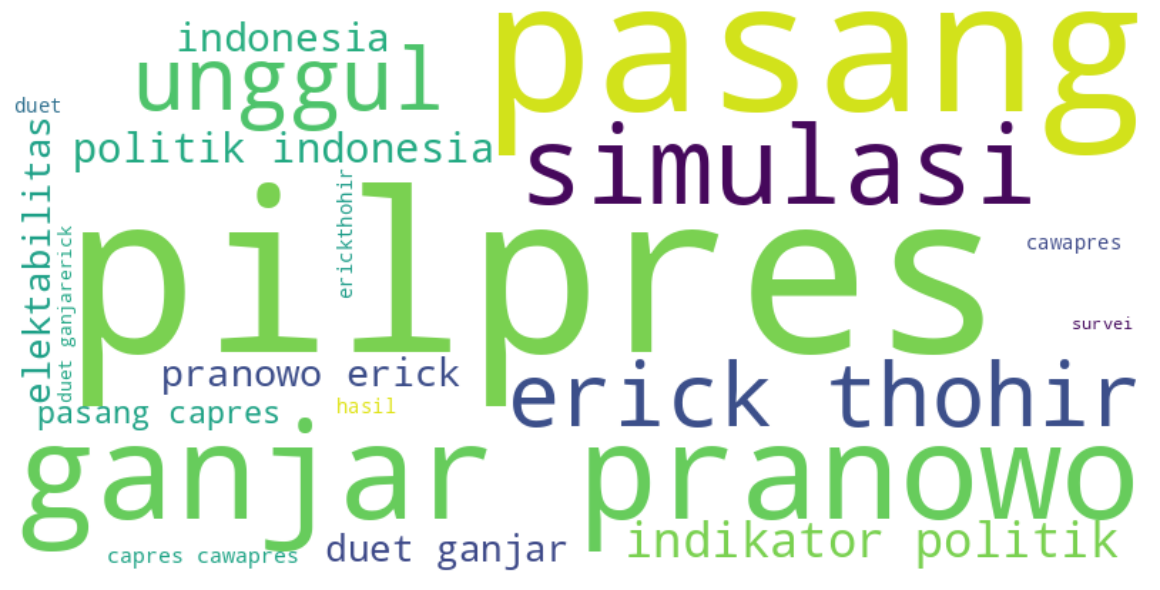

In [54]:
import pandas as pd
import numpy as np
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt


# Menggabungkan semua tweet menjadi satu string
data = ' '.join(cluster_0['full_text'].tolist())

# Menghilangkan kata-kata yang tidak diinginkan
stopwords = set(STOPWORDS)
stopwords.update(['https', 'co', 'RT', '...', 'amp'])

# Membuat objek WordCloud
wc = WordCloud(stopwords=stopwords, background_color="white", max_words=20, width=800, height=400)

# Menghasilkan WordCloud dari string tweet
wc.generate(data)

# Menampilkan WordCloud
plt.figure(figsize=(12, 6))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.tight_layout()

# Simpan WordCloud ke file PNG dengan kualitas tinggi
plt.savefig('wordcloud.png', dpi=300)

# Tampilkan WordCloud
plt.show()

# ***C-1***

In [55]:
import pandas as pd

# Memuat data dari file CSV
cluster_1 = pd.read_csv('cluster_1.csv')

# Menampilkan beberapa baris pertama dari DataFrame
cluster_1.head(4)

full_text  Cluster
0  gerindra amat rakyat nusantara merah putih ind...        1
1  ngeri banget gak pas pilpres kepala negara mai...        1
2  pimpin bangsa pilpres nnganjar pranowo sosok p...        1
3  poltracking indonesia cawapres tentu hasil pil...        1

In [56]:
cluster_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91 entries, 0 to 90
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   full_text  91 non-null     object
 1   Cluster    91 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.5+ KB


In [57]:
#Working with the most Frequent Words:
from collections import Counter
cnt = Counter()
for text in cluster_1["full_text"].values:
    for word in text.split():
        cnt[word] += 1
cnt.most_common(10)
temp = pd.DataFrame(cnt.most_common(10))
temp.columns=['word', 'count']
temp

word  count
0  indonesia     98
1    pilpres     93
2     rakyat     57
3       maju     34
4     dukung     24
5      nilai     19
6   presiden     18
7     negara     17
8     capres     17
9      pilih     16

In [58]:
import matplotlib.pyplot as plt
import plotly.express as px

# Mengurutkan data berdasarkan nilai count secara descending
temp_sorted = temp.sort_values(by='count', ascending=False)

# Membuat plot menggunakan data yang telah diurutkan
fig = px.bar(temp_sorted, x="count", y="word", title='Jumlah Kata Tweet Yang Sering Muncul', orientation='h', width=800, height=700)

# Membalikkan urutan sumbu y
fig.update_yaxes(autorange="reversed")

# Menampilkan plot
fig.show()

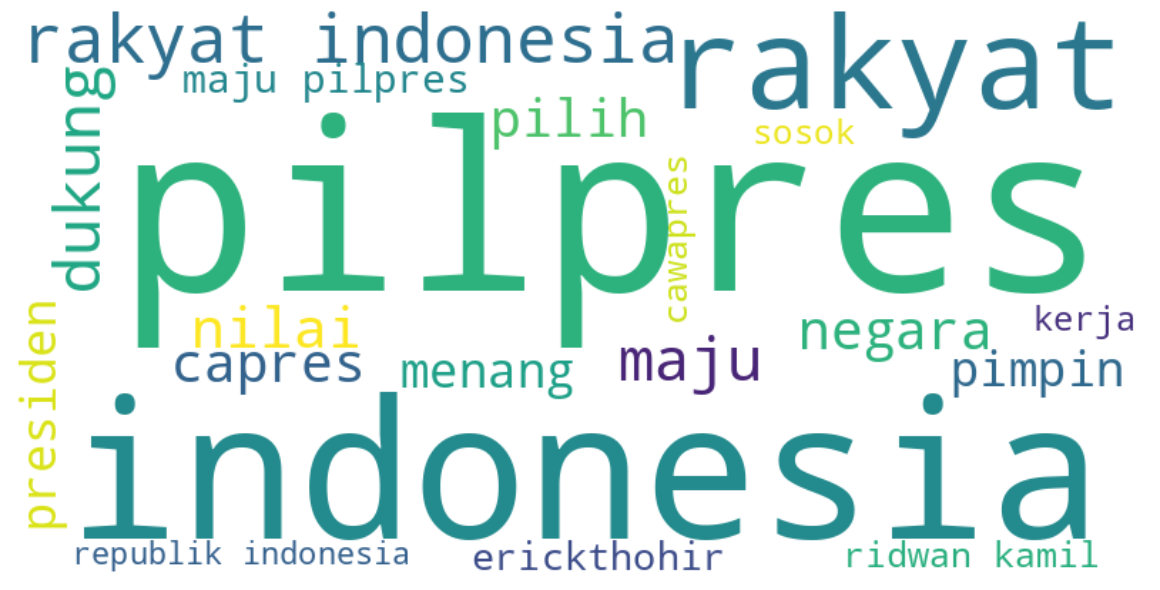

In [59]:
import pandas as pd
import numpy as np
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt


# Menggabungkan semua tweet menjadi satu string
data = ' '.join(cluster_1['full_text'].tolist())

# Menghilangkan kata-kata yang tidak diinginkan
stopwords = set(STOPWORDS)
stopwords.update(['https', 'co', 'RT', '...', 'amp'])

# Membuat objek WordCloud
wc = WordCloud(stopwords=stopwords, background_color="white", max_words=20, width=800, height=400)

# Menghasilkan WordCloud dari string tweet
wc.generate(data)

# Menampilkan WordCloud
plt.figure(figsize=(12, 6))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.tight_layout()

# Simpan WordCloud ke file PNG dengan kualitas tinggi
plt.savefig('wordcloud1.png', dpi=300)

# Tampilkan WordCloud
plt.show()

# ***C-2***

In [60]:
import pandas as pd

# Memuat data dari file CSV
cluster_2 = pd.read_csv('cluster_2.csv')

# Menampilkan beberapa baris pertama dari DataFrame
cluster_2.head(4)

full_text  Cluster
0  pilih megawati capres pdip puan tugas menang g...        2
1  selamat moga suksesnpartai demokrasi indonesia...        2
2  ferdinandmpu prabowo jokowi moga prabowo puan ...        2
3  nakula prabowo puan track record pimpin sukses...        2

In [61]:
cluster_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42 entries, 0 to 41
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   full_text  42 non-null     object
 1   Cluster    42 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 800.0+ bytes


In [62]:
#Working with the most Frequent Words:
from collections import Counter
cnt = Counter()
for text in cluster_2["full_text"].values:
    for word in text.split():
        cnt[word] += 1
cnt.most_common(10)
temp = pd.DataFrame(cnt.most_common(10))
temp.columns=['word', 'count']
temp

word  count
0       puan     60
1  indonesia     44
2    pilpres     43
3   maharani     29
4       maju     27
5    prabowo     19
6     dukung     17
7       pdip     16
8     capres     14
9   presiden     10

In [63]:
import matplotlib.pyplot as plt
import plotly.express as px

# Mengurutkan data berdasarkan nilai count secara descending
temp_sorted = temp.sort_values(by='count', ascending=False)

# Membuat plot menggunakan data yang telah diurutkan
fig = px.bar(temp_sorted, x="count", y="word", title='Jumlah Kata Tweet Yang Sering Muncul', orientation='h', width=800, height=700)

# Membalikkan urutan sumbu y
fig.update_yaxes(autorange="reversed")

# Menampilkan plot
fig.show()

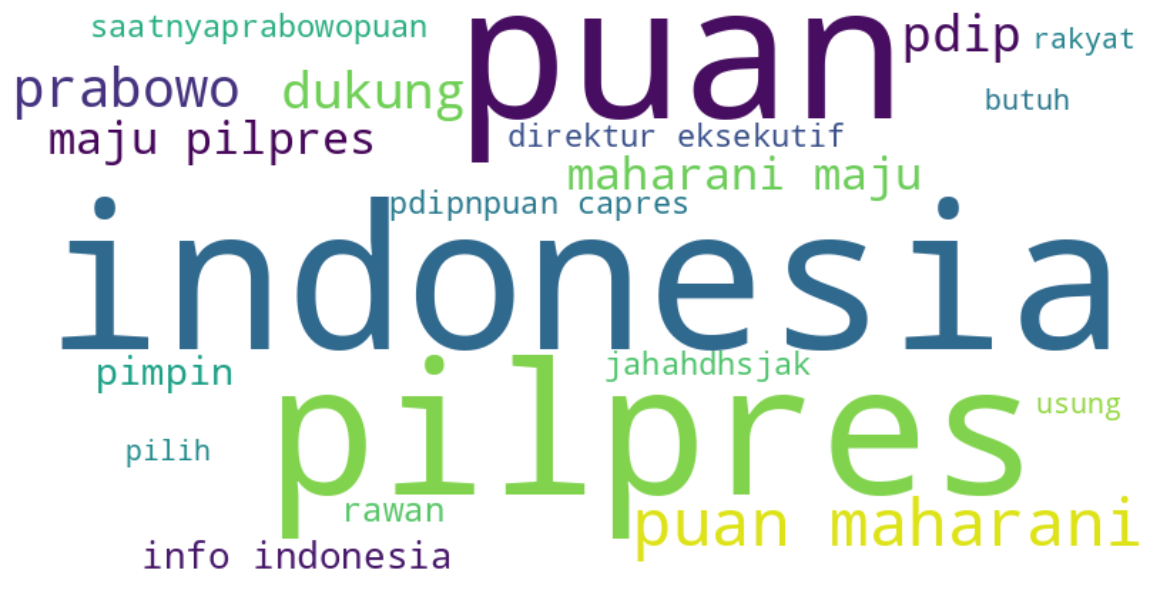

In [64]:
import pandas as pd
import numpy as np
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt


# Menggabungkan semua tweet menjadi satu string
data = ' '.join(cluster_2['full_text'].tolist())

# Menghilangkan kata-kata yang tidak diinginkan
stopwords = set(STOPWORDS)
stopwords.update(['https', 'co', 'RT', '...', 'amp'])

# Membuat objek WordCloud
wc = WordCloud(stopwords=stopwords, background_color="white", max_words=20, width=800, height=400)

# Menghasilkan WordCloud dari string tweet
wc.generate(data)

# Menampilkan WordCloud
plt.figure(figsize=(12, 6))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.tight_layout()

# Simpan WordCloud ke file PNG dengan kualitas tinggi
plt.savefig('wordcloud2.png', dpi=300)

# Tampilkan WordCloud
plt.show()

# ***C-3***

In [65]:
import pandas as pd

# Memuat data dari file CSV
cluster_3 = pd.read_csv('cluster_3.csv')

# Menampilkan beberapa baris pertama dari DataFrame
cluster_3.head(4)

full_text  Cluster
0  rawan jawara banten dukung erick thohirnnrelaw...        3
1  rawan jawara banten dukung erickthohir maju pi...        3
2  menteri bumn erick thohir dukung deklarasi maj...        3
3  dukung deklarasi dukung menteri bumn erick tho...        3

In [66]:
cluster_3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38 entries, 0 to 37
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   full_text  38 non-null     object
 1   Cluster    38 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 736.0+ bytes


In [67]:
#Working with the most Frequent Words:
from collections import Counter
cnt = Counter()
for text in cluster_3["full_text"].values:
    for word in text.split():
        cnt[word] += 1
cnt.most_common(10)
temp = pd.DataFrame(cnt.most_common(10))
temp.columns=['word', 'count']
temp

word  count
0                 erick     44
1               pilpres     39
2             indonesia     39
3                thohir     38
4                dukung     37
5                 rawan     23
6                pimpin     23
7  satsetsahabatsetiaet     21
8                  maju     20
9                bersih     20

In [68]:
import matplotlib.pyplot as plt
import plotly.express as px

# Mengurutkan data berdasarkan nilai count secara descending
temp_sorted = temp.sort_values(by='count', ascending=False)

# Membuat plot menggunakan data yang telah diurutkan
fig = px.bar(temp_sorted, x="count", y="word", title='Jumlah Kata Tweet Yang Sering Muncul', orientation='h', width=800, height=700)

# Membalikkan urutan sumbu y
fig.update_yaxes(autorange="reversed")

# Menampilkan plot
fig.show()

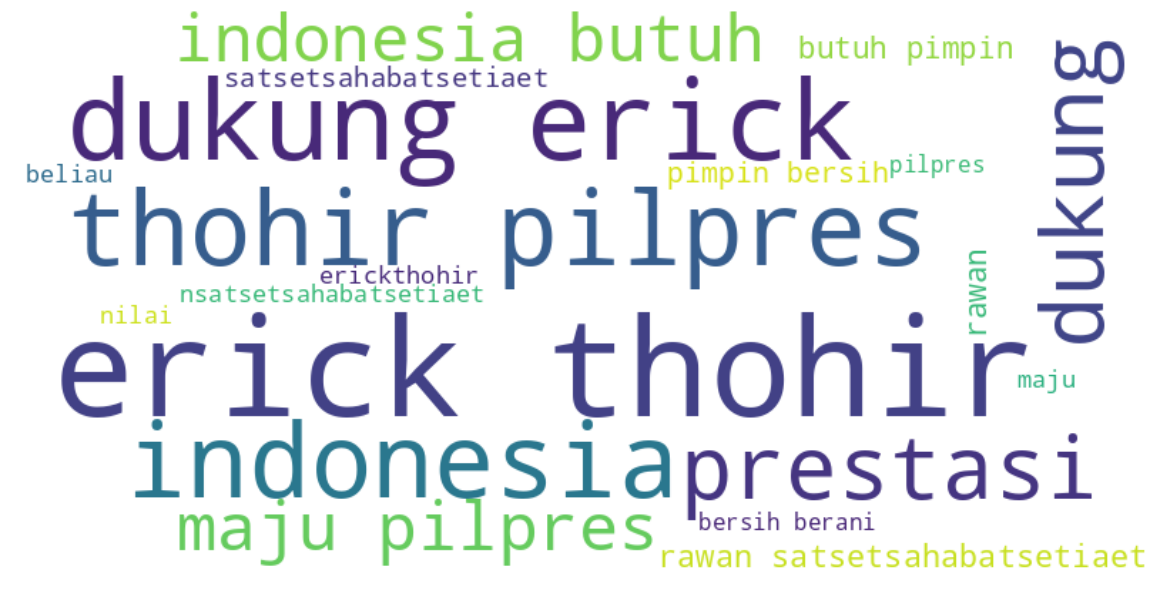

In [69]:
import pandas as pd
import numpy as np
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt


# Menggabungkan semua tweet menjadi satu string
data = ' '.join(cluster_3['full_text'].tolist())

# Menghilangkan kata-kata yang tidak diinginkan
stopwords = set(STOPWORDS)
stopwords.update(['https', 'co', 'RT', '...', 'amp'])

# Membuat objek WordCloud
wc = WordCloud(stopwords=stopwords, background_color="white", max_words=20, width=800, height=400)

# Menghasilkan WordCloud dari string tweet
wc.generate(data)

# Menampilkan WordCloud
plt.figure(figsize=(12, 6))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.tight_layout()

# Simpan WordCloud ke file PNG dengan kualitas tinggi
plt.savefig('wordcloud3.png', dpi=300)

# Tampilkan WordCloud
plt.show()

# ***C-4***

In [70]:
import pandas as pd

# Memuat data dari file CSV
cluster_4 = pd.read_csv('cluster_4.csv')

# Menampilkan beberapa baris pertama dari DataFrame
cluster_4.head(4)

full_text  Cluster
0  aniesbaswedan karniilyas insha allah anies men...        4
1  oposisicerdas pilpres gelar ninsya allah rakya...        4
2  salah baris dukung anies baswedan partai ummat...        4
3  jakarta pimpin anies nada ajar nnbahwa aniesba...        4

In [71]:
cluster_4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   full_text  148 non-null    object
 1   Cluster    148 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 2.4+ KB


In [72]:
#Working with the most Frequent Words:
from collections import Counter
cnt = Counter()
for text in cluster_4["full_text"].values:
    for word in text.split():
        cnt[word] += 1
cnt.most_common(10)
temp = pd.DataFrame(cnt.most_common(10))
temp.columns=['word', 'count']
temp

word  count
0          anies    204
1        pilpres    144
2      indonesia    135
3       baswedan     72
4         dukung     47
5         menang     40
6       presiden     40
7  aniesbaswedan     34
8          pilih     34
9         rakyat     31

In [73]:
import matplotlib.pyplot as plt
import plotly.express as px

# Mengurutkan data berdasarkan nilai count secara descending
temp_sorted = temp.sort_values(by='count', ascending=False)

# Membuat plot menggunakan data yang telah diurutkan
fig = px.bar(temp_sorted, x="count", y="word", title='Jumlah Kata Tweet Yang Sering Muncul', orientation='h', width=800, height=700)

# Membalikkan urutan sumbu y
fig.update_yaxes(autorange="reversed")

# Menampilkan plot
fig.show()

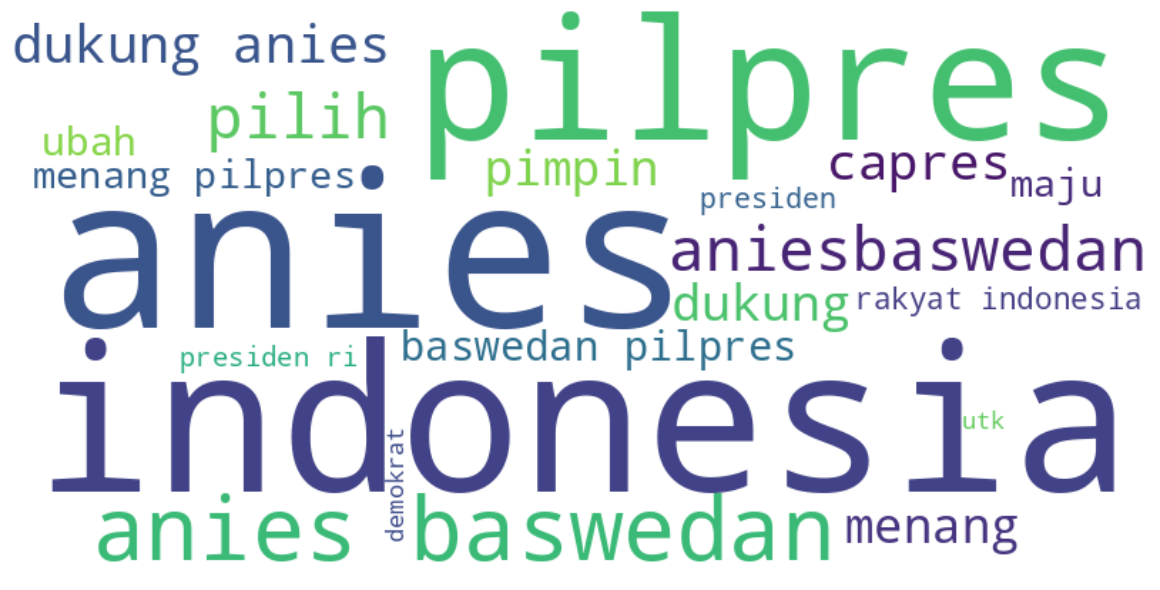

In [74]:
import pandas as pd
import numpy as np
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt


# Menggabungkan semua tweet menjadi satu string
data = ' '.join(cluster_4['full_text'].tolist())

# Menghilangkan kata-kata yang tidak diinginkan
stopwords = set(STOPWORDS)
stopwords.update(['https', 'co', 'RT', '...', 'amp'])

# Membuat objek WordCloud
wc = WordCloud(stopwords=stopwords, background_color="white", max_words=20, width=800, height=400)

# Menghasilkan WordCloud dari string tweet
wc.generate(data)

# Menampilkan WordCloud
plt.figure(figsize=(12, 6))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.tight_layout()

# Simpan WordCloud ke file PNG dengan kualitas tinggi
plt.savefig('wordcloud4.png', dpi=300)

# Tampilkan WordCloud
plt.show()

# ***C-5***

In [75]:
import pandas as pd

# Memuat data dari file CSV
cluster_5 = pd.read_csv('cluster_5.csv')

# Menampilkan beberapa baris pertama dari DataFrame
cluster_5.head(4)

full_text  Cluster
0  partai golkar potensi gabung koalisi untun had...        5
1  kib solid ppp dukung ganjar pilpres nnairlangg...        5
2  klo spt prediksi koalisi n pdipn koalisi indon...        5
3  partai amanat nasional pan anggota koalisi ind...        5

In [76]:
cluster_5.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68 entries, 0 to 67
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   full_text  68 non-null     object
 1   Cluster    68 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.2+ KB


In [77]:
#Working with the most Frequent Words:
from collections import Counter
cnt = Counter()
for text in cluster_5["full_text"].values:
    for word in text.split():
        cnt[word] += 1
cnt.most_common(10)
temp = pd.DataFrame(cnt.most_common(10))
temp.columns=['word', 'count']
temp

word  count
0    koalisi     91
1  indonesia     75
2       satu     75
3    pilpres     67
4        kib     48
5     partai     34
6        ppp     31
7     ganjar     31
8      usung     29
9   presiden     27

In [78]:
import matplotlib.pyplot as plt
import plotly.express as px

# Mengurutkan data berdasarkan nilai count secara descending
temp_sorted = temp.sort_values(by='count', ascending=False)

# Membuat plot menggunakan data yang telah diurutkan
fig = px.bar(temp_sorted, x="count", y="word", title='Jumlah Kata Tweet Yang Sering Muncul', orientation='h', width=800, height=700)

# Membalikkan urutan sumbu y
fig.update_yaxes(autorange="reversed")

# Menampilkan plot
fig.show()

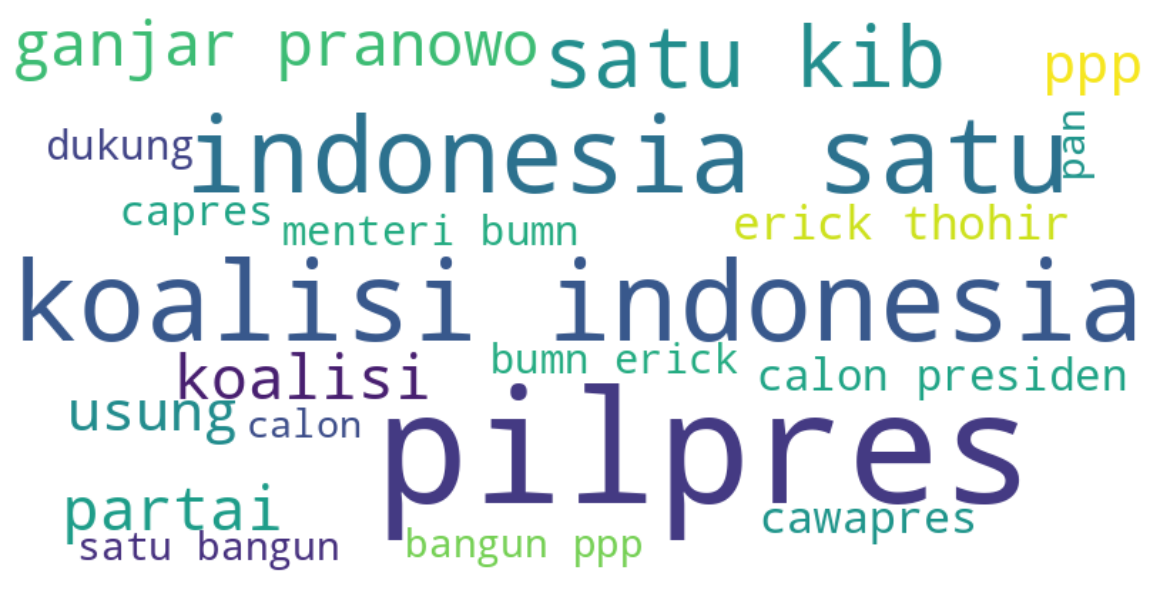

In [79]:
import pandas as pd
import numpy as np
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt


# Menggabungkan semua tweet menjadi satu string
data = ' '.join(cluster_5['full_text'].tolist())

# Menghilangkan kata-kata yang tidak diinginkan
stopwords = set(STOPWORDS)
stopwords.update(['https', 'co', 'RT', '...', 'amp'])

# Membuat objek WordCloud
wc = WordCloud(stopwords=stopwords, background_color="white", max_words=20, width=800, height=400)

# Menghasilkan WordCloud dari string tweet
wc.generate(data)

# Menampilkan WordCloud
plt.figure(figsize=(12, 6))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.tight_layout()

# Simpan WordCloud ke file PNG dengan kualitas tinggi
plt.savefig('wordcloud5.png', dpi=300)

# Tampilkan WordCloud
plt.show()

# ***C-6***

In [80]:
import pandas as pd

# Memuat data dari file CSV
cluster_6 = pd.read_csv('cluster_6.csv')

# Menampilkan beberapa baris pertama dari DataFrame
cluster_6.head(4)

full_text  Cluster
0  ganjar pranowo erick thohir pimpin kompeten ma...        6
1  tum dpp foreder aidil fitri nilai duet ganjar ...        6
2  survei ada poltracking indonesia elektabilitas...        6
3  menteri agama yaqut cholil qoumas pandang eric...        6

In [81]:
cluster_6.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85 entries, 0 to 84
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   full_text  85 non-null     object
 1   Cluster    85 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.5+ KB


In [82]:
#Working with the most Frequent Words:
from collections import Counter
cnt = Counter()
for text in cluster_6["full_text"].values:
    for word in text.split():
        cnt[word] += 1
cnt.most_common(10)
temp = pd.DataFrame(cnt.most_common(10))
temp.columns=['word', 'count']
temp

word  count
0      erick    120
1     thohir    102
2    pilpres     86
3  indonesia     72
4     ganjar     47
5     pimpin     32
6    pranowo     27
7       maju     27
8   cawapres     27
9     dukung     24

In [83]:
import matplotlib.pyplot as plt
import plotly.express as px

# Mengurutkan data berdasarkan nilai count secara descending
temp_sorted = temp.sort_values(by='count', ascending=False)

# Membuat plot menggunakan data yang telah diurutkan
fig = px.bar(temp_sorted, x="count", y="word", title='Jumlah Kata Tweet Yang Sering Muncul', orientation='h', width=800, height=700)

# Membalikkan urutan sumbu y
fig.update_yaxes(autorange="reversed")

# Menampilkan plot
fig.show()

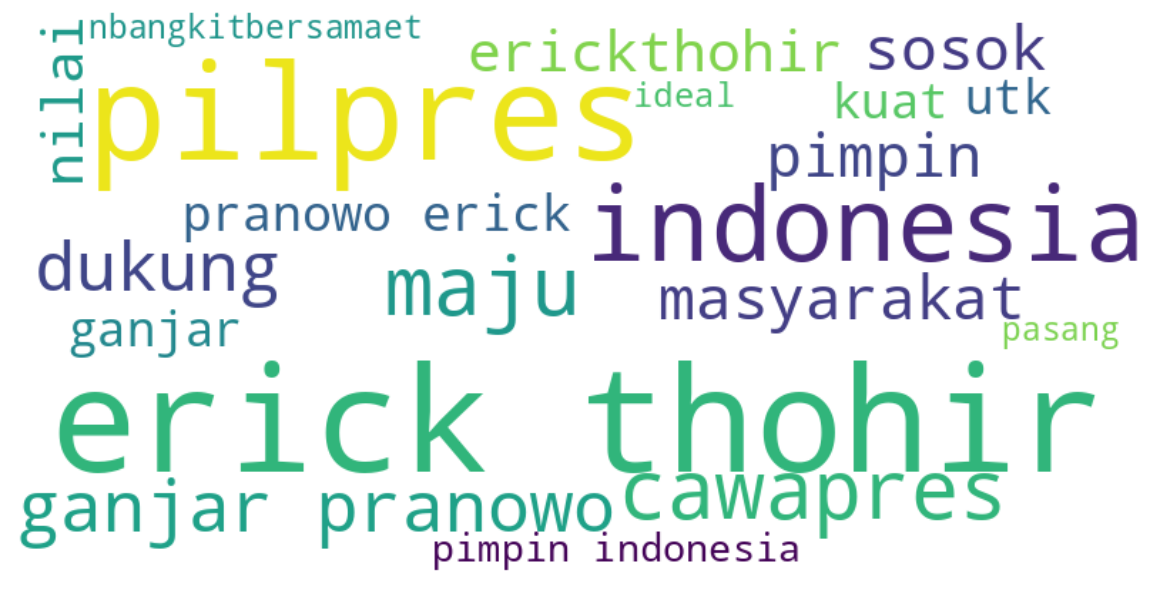

In [84]:
import pandas as pd
import numpy as np
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt


# Menggabungkan semua tweet menjadi satu string
data = ' '.join(cluster_6['full_text'].tolist())

# Menghilangkan kata-kata yang tidak diinginkan
stopwords = set(STOPWORDS)
stopwords.update(['https', 'co', 'RT', '...', 'amp'])

# Membuat objek WordCloud
wc = WordCloud(stopwords=stopwords, background_color="white", max_words=20, width=800, height=400)

# Menghasilkan WordCloud dari string tweet
wc.generate(data)

# Menampilkan WordCloud
plt.figure(figsize=(12, 6))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.tight_layout()

# Simpan WordCloud ke file PNG dengan kualitas tinggi
plt.savefig('wordcloud6.png', dpi=300)

# Tampilkan WordCloud
plt.show()

# ***C-7***

In [85]:
import pandas as pd

# Memuat data dari file CSV
cluster_7 = pd.read_csv('cluster_7.csv')

# Menampilkan beberapa baris pertama dari DataFrame
cluster_7.head(4)

full_text  Cluster
0  ganjar pranowo satu partai demokrasi indonesia...        7
1  sinergi partai demokrasi indonesia juang parta...        7
2  breaking newsnndukung ganjar bacapres pilpres ...        7
3  partai demokrasi indonesia juang pdi p partai ...        7

In [86]:
cluster_7.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   full_text  52 non-null     object
 1   Cluster    52 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 960.0+ bytes


In [87]:
#Working with the most Frequent Words:
from collections import Counter
cnt = Counter()
for text in cluster_7["full_text"].values:
    for word in text.split():
        cnt[word] += 1
cnt.most_common(10)
temp = pd.DataFrame(cnt.most_common(10))
temp.columns=['word', 'count']
temp

word  count
0     partai     67
1    pilpres     51
2  indonesia     49
3   presiden     45
4       pdip     39
5      juang     34
6     ganjar     33
7      calon     33
8  demokrasi     29
9    pranowo     27

In [88]:
import matplotlib.pyplot as plt
import plotly.express as px

# Mengurutkan data berdasarkan nilai count secara descending
temp_sorted = temp.sort_values(by='count', ascending=False)

# Membuat plot menggunakan data yang telah diurutkan
fig = px.bar(temp_sorted, x="count", y="word", title='Jumlah Kata Tweet Yang Sering Muncul', orientation='h', width=800, height=700)

# Membalikkan urutan sumbu y
fig.update_yaxes(autorange="reversed")

# Menampilkan plot
fig.show()

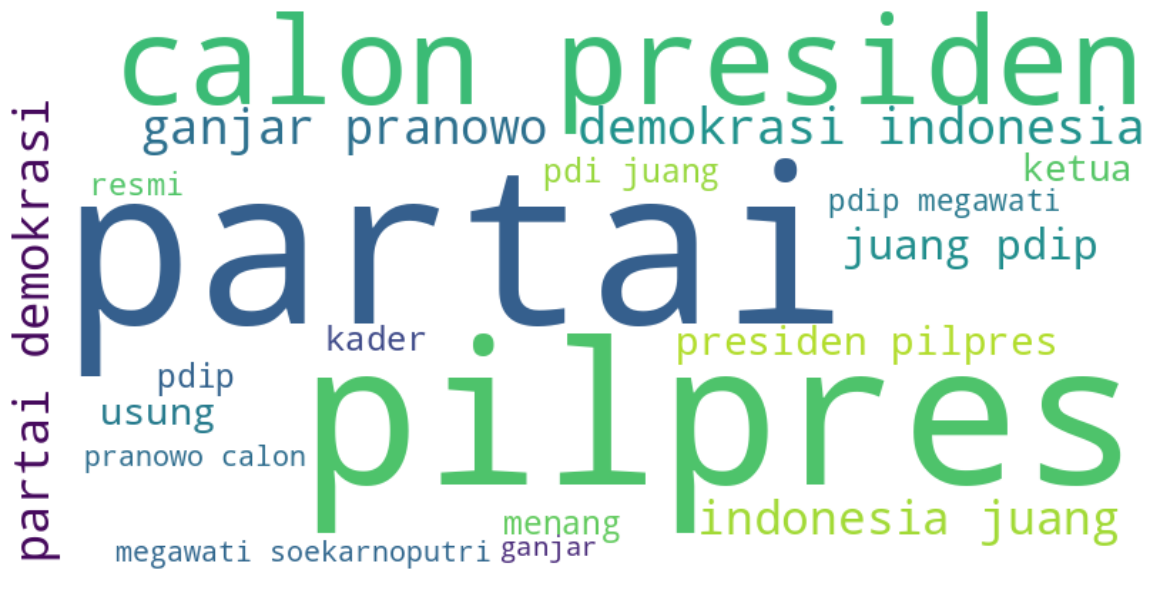

In [89]:
import pandas as pd
import numpy as np
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt


# Menggabungkan semua tweet menjadi satu string
data = ' '.join(cluster_7['full_text'].tolist())

# Menghilangkan kata-kata yang tidak diinginkan
stopwords = set(STOPWORDS)
stopwords.update(['https', 'co', 'RT', '...', 'amp'])

# Membuat objek WordCloud
wc = WordCloud(stopwords=stopwords, background_color="white", max_words=20, width=800, height=400)

# Menghasilkan WordCloud dari string tweet
wc.generate(data)

# Menampilkan WordCloud
plt.figure(figsize=(12, 6))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.tight_layout()

# Simpan WordCloud ke file PNG dengan kualitas tinggi
plt.savefig('wordcloud7.png', dpi=300)

# Tampilkan WordCloud
plt.show()

# ***C-8***

In [90]:
import pandas as pd

# Memuat data dari file CSV
cluster_8 = pd.read_csv('cluster_8.csv')

# Menampilkan beberapa baris pertama dari DataFrame
cluster_8.head(4)

full_text  Cluster
0  dpd bmi banteng muda indonesia provinsi banten...        8
1  bmi banten menang ganjar pranowonnketua dpd ba...        8
2  bmi menang ganjar pranowo pilpres nnketua dpp ...        8
3  nama moeldoko leading era pilpres cawapres jok...        8

In [91]:
cluster_8.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48 entries, 0 to 47
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   full_text  48 non-null     object
 1   Cluster    48 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 896.0+ bytes


In [92]:
#Working with the most Frequent Words:
from collections import Counter
cnt = Counter()
for text in cluster_8["full_text"].values:
    for word in text.split():
        cnt[word] += 1
cnt.most_common(10)
temp = pd.DataFrame(cnt.most_common(10))
temp.columns=['word', 'count']
temp

word  count
0    pilpres     50
1  indonesia     40
2       muda     34
3     dukung     28
4     ganjar     26
5       malu     24
6      musra     23
7   moeldoko     22
8       anak     22
9       maju     21

In [93]:
import matplotlib.pyplot as plt
import plotly.express as px

# Mengurutkan data berdasarkan nilai count secara descending
temp_sorted = temp.sort_values(by='count', ascending=False)

# Membuat plot menggunakan data yang telah diurutkan
fig = px.bar(temp_sorted, x="count", y="word", title='Jumlah Kata Tweet Yang Sering Muncul', orientation='h', width=800, height=700)

# Membalikkan urutan sumbu y
fig.update_yaxes(autorange="reversed")

# Menampilkan plot
fig.show()

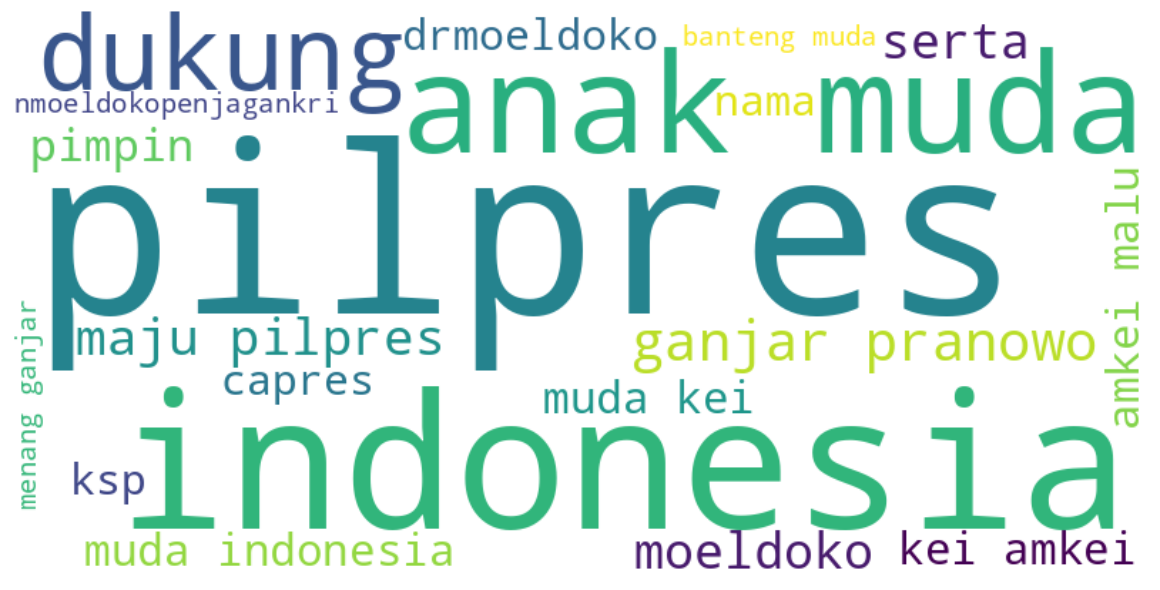

In [94]:
import pandas as pd
import numpy as np
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt


# Menggabungkan semua tweet menjadi satu string
data = ' '.join(cluster_8['full_text'].tolist())

# Menghilangkan kata-kata yang tidak diinginkan
stopwords = set(STOPWORDS)
stopwords.update(['https', 'co', 'RT', '...', 'amp'])

# Membuat objek WordCloud
wc = WordCloud(stopwords=stopwords, background_color="white", max_words=20, width=800, height=400)

# Menghasilkan WordCloud dari string tweet
wc.generate(data)

# Menampilkan WordCloud
plt.figure(figsize=(12, 6))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.tight_layout()

# Simpan WordCloud ke file PNG dengan kualitas tinggi
plt.savefig('wordcloud8.png', dpi=300)

# Tampilkan WordCloud
plt.show()

# ***C-9***

In [95]:
import pandas as pd

# Memuat data dari file CSV
cluster_9 = pd.read_csv('cluster_9.csv')

# Menampilkan beberapa baris pertama dari DataFrame
cluster_9.head(4)

full_text  Cluster
0  prabowo cawapres pilpres kantong cnn indonesia...        9
1  pan klaim ajak pdip usung ganjar pilpres cnn i...        9
2  pdip duet prabowoganjar pilpres nggak masuk ak...        9
3  gerindra duet aniessandi pilpres monggo cnn in...        9

In [96]:
cluster_9.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39 entries, 0 to 38
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   full_text  39 non-null     object
 1   Cluster    39 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 752.0+ bytes


In [97]:
#Working with the most Frequent Words:
from collections import Counter
cnt = Counter()
for text in cluster_9["full_text"].values:
    for word in text.split():
        cnt[word] += 1
cnt.most_common(10)
temp = pd.DataFrame(cnt.most_common(10))
temp.columns=['word', 'count']
temp

word  count
0       indonesia     43
1         prabowo     41
2         pilpres     39
3  bangkitbersama     39
4             cnn     20
5        subianto     20
6   prabowounggul     16
7           anies      8
8         network      6
9          bisnis      6

In [98]:
import matplotlib.pyplot as plt
import plotly.express as px

# Mengurutkan data berdasarkan nilai count secara descending
temp_sorted = temp.sort_values(by='count', ascending=False)

# Membuat plot menggunakan data yang telah diurutkan
fig = px.bar(temp_sorted, x="count", y="word", title='Jumlah Kata Tweet Yang Sering Muncul', orientation='h', width=800, height=700)

# Membalikkan urutan sumbu y
fig.update_yaxes(autorange="reversed")

# Menampilkan plot
fig.show()

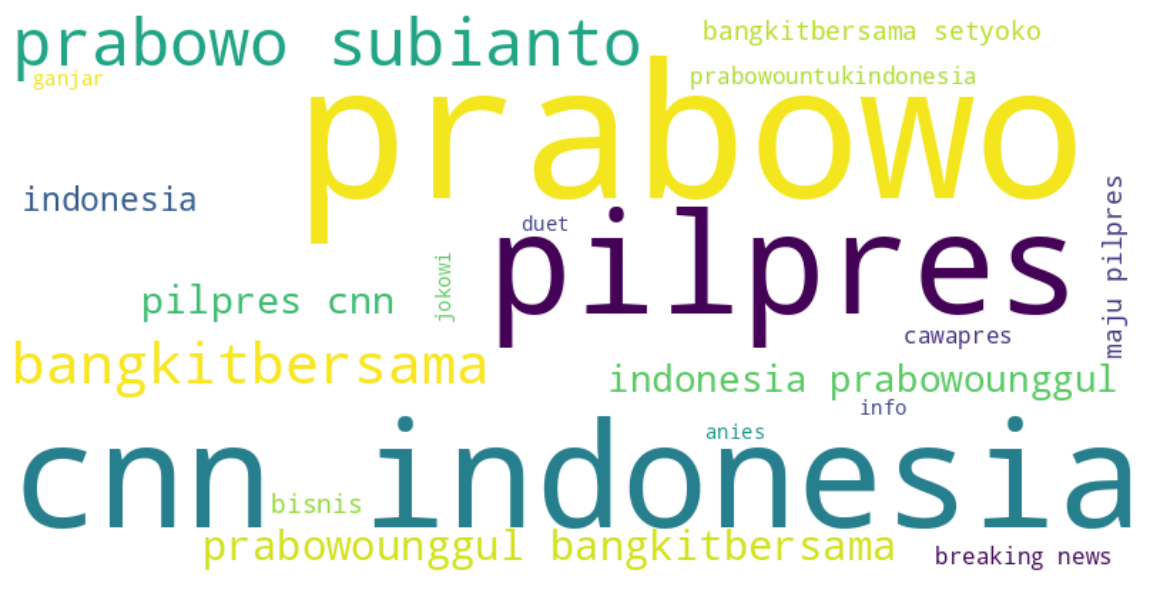

In [99]:
import pandas as pd
import numpy as np
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt


# Menggabungkan semua tweet menjadi satu string
data = ' '.join(cluster_9['full_text'].tolist())

# Menghilangkan kata-kata yang tidak diinginkan
stopwords = set(STOPWORDS)
stopwords.update(['https', 'co', 'RT', '...', 'amp'])

# Membuat objek WordCloud
wc = WordCloud(stopwords=stopwords, background_color="white", max_words=20, width=800, height=400)

# Menghasilkan WordCloud dari string tweet
wc.generate(data)

# Menampilkan WordCloud
plt.figure(figsize=(12, 6))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.tight_layout()

# Simpan WordCloud ke file PNG dengan kualitas tinggi
plt.savefig('wordcloud9.png', dpi=300)

# Tampilkan WordCloud
plt.show()

# ***C-10***

In [100]:
import pandas as pd

# Memuat data dari file CSV
cluster_10 = pd.read_csv('cluster_10.csv')

# Menampilkan beberapa baris pertama dari DataFrame
cluster_10.head(4)

full_text  Cluster
0                     bismillah ganjarpranowo utk ri       10
1  bismilah ganjar pranowo tugiman moga tdk presi...       10
2  datuakrajoangek ganjar vs prabowo jokowi ps ta...       10
3  pilpres tinggal tokoh usung calon presiden pil...       10

In [101]:
cluster_10.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 577 entries, 0 to 576
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   full_text  575 non-null    object
 1   Cluster    577 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 9.1+ KB


In [106]:
#Working with the most Frequent Words:
from collections import Counter

# Membaca dataset
cluster_10 = pd.read_csv('cluster_10.csv')

# Menggantikan nilai float dengan string kosong
cluster_10['full_text'] = cluster_10['full_text'].fillna('')

cnt = Counter()
for text in cluster_10["full_text"].values:
    for word in text.split():
        cnt[word] += 1
cnt.most_common(10)
temp = pd.DataFrame(cnt.most_common(10))
temp.columns=['word', 'count']
temp

word  count
0    pilpres    537
1  indonesia    514
2     ganjar    138
3     jokowi    108
4     dukung    103
5   presiden     96
6     menang     94
7    politik     91
8      pilih     90
9        amp     66

In [107]:
import matplotlib.pyplot as plt
import plotly.express as px

# Mengurutkan data berdasarkan nilai count secara descending
temp_sorted = temp.sort_values(by='count', ascending=False)

# Membuat plot menggunakan data yang telah diurutkan
fig = px.bar(temp_sorted, x="count", y="word", title='Jumlah Kata Tweet Yang Sering Muncul', orientation='h', width=800, height=700)

# Membalikkan urutan sumbu y
fig.update_yaxes(autorange="reversed")

# Menampilkan plot
fig.show()

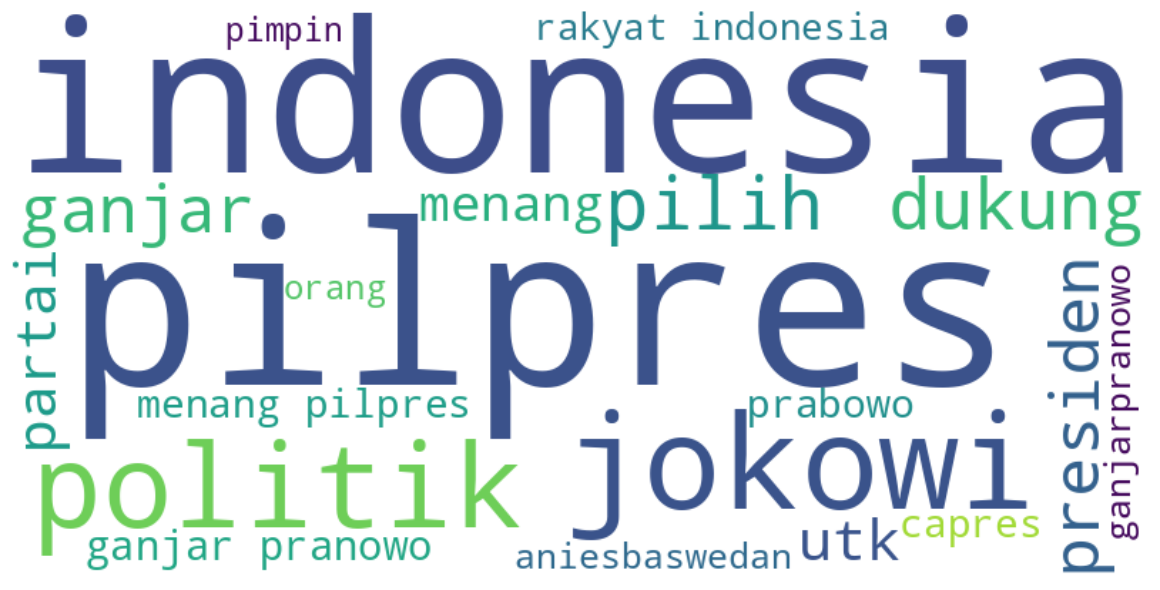

In [108]:
import pandas as pd
import numpy as np
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt


# Menggabungkan semua tweet menjadi satu string
data = ' '.join(cluster_10['full_text'].tolist())

# Menghilangkan kata-kata yang tidak diinginkan
stopwords = set(STOPWORDS)
stopwords.update(['https', 'co', 'RT', '...', 'amp'])

# Membuat objek WordCloud
wc = WordCloud(stopwords=stopwords, background_color="white", max_words=20, width=800, height=400)

# Menghasilkan WordCloud dari string tweet
wc.generate(data)

# Menampilkan WordCloud
plt.figure(figsize=(12, 6))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.tight_layout()

# Simpan WordCloud ke file PNG dengan kualitas tinggi
plt.savefig('wordcloud10.png', dpi=300)

# Tampilkan WordCloud
plt.show()

# ***C-11***

In [109]:
import pandas as pd

# Memuat data dari file CSV
cluster_11 = pd.read_csv('cluster_11.csv')

# Menampilkan beberapa baris pertama dari DataFrame
cluster_11.head(4)

full_text  Cluster
0  jakarta cnn indonesia ketua partai gerindra pr...       11
1  jakarta cnn indonesia ketua partai gerindra pr...       11
2  ketua partai gerindra prabowo subianto kriteri...       11
3  helmifelis kader partai gerindra juang maksima...       11

In [110]:
cluster_11.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68 entries, 0 to 67
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   full_text  68 non-null     object
 1   Cluster    68 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.2+ KB


In [111]:
#Working with the most Frequent Words:
from collections import Counter
cnt = Counter()
for text in cluster_11["full_text"].values:
    for word in text.split():
        cnt[word] += 1
cnt.most_common(10)
temp = pd.DataFrame(cnt.most_common(10))
temp.columns=['word', 'count']
temp

word  count
0    prabowo     80
1    pilpres     73
2   gerindra     69
3   subianto     65
4     partai     56
5  indonesia     48
6      ketua     33
7    koalisi     25
8   presiden     23
9  ikutpakde     23

In [112]:
import matplotlib.pyplot as plt
import plotly.express as px

# Mengurutkan data berdasarkan nilai count secara descending
temp_sorted = temp.sort_values(by='count', ascending=False)

# Membuat plot menggunakan data yang telah diurutkan
fig = px.bar(temp_sorted, x="count", y="word", title='Jumlah Kata Tweet Yang Sering Muncul', orientation='h', width=800, height=700)

# Membalikkan urutan sumbu y
fig.update_yaxes(autorange="reversed")

# Menampilkan plot
fig.show()

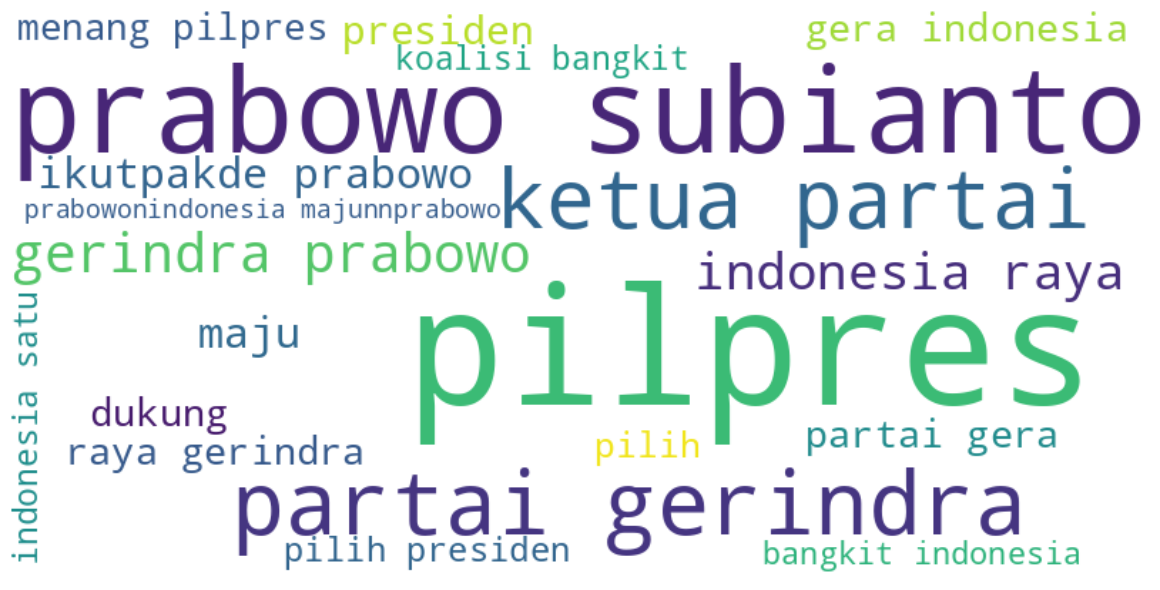

In [113]:
import pandas as pd
import numpy as np
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt


# Menggabungkan semua tweet menjadi satu string
data = ' '.join(cluster_11['full_text'].tolist())

# Menghilangkan kata-kata yang tidak diinginkan
stopwords = set(STOPWORDS)
stopwords.update(['https', 'co', 'RT', '...', 'amp'])

# Membuat objek WordCloud
wc = WordCloud(stopwords=stopwords, background_color="white", max_words=20, width=800, height=400)

# Menghasilkan WordCloud dari string tweet
wc.generate(data)

# Menampilkan WordCloud
plt.figure(figsize=(12, 6))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.tight_layout()

# Simpan WordCloud ke file PNG dengan kualitas tinggi
plt.savefig('wordcloud11.png', dpi=300)

# Tampilkan WordCloud
plt.show()

# ***C-12***

In [114]:
import pandas as pd

# Memuat data dari file CSV
cluster_12 = pd.read_csv('cluster_12.csv')

# Menampilkan beberapa baris pertama dari DataFrame
cluster_12.head(4)

full_text  Cluster
0  amat politik perfekto indonesia amir faisal me...       12
1  figur pontesial layak maju pilpres nnmenteri a...       12
2  tarik ganjarpranowo erickthohir pilih utama ma...       12
3  duet capres ganjarpranowo cawapres erickthohir...       12

In [115]:
cluster_12.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65 entries, 0 to 64
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   full_text  65 non-null     object
 1   Cluster    65 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.1+ KB


In [116]:
#Working with the most Frequent Words:
from collections import Counter
cnt = Counter()
for text in cluster_12["full_text"].values:
    for word in text.split():
        cnt[word] += 1
cnt.most_common(10)
temp = pd.DataFrame(cnt.most_common(10))
temp.columns=['word', 'count']
temp

word  count
0             pimpin     66
1            pilpres     65
2          indonesia     64
3        erickthohir     63
4               bumn     46
5            menteri     37
6              nilai     24
7  nbangkitbersamaet     24
8              milik     19
9      ganjarpranowo     18

In [117]:
import matplotlib.pyplot as plt
import plotly.express as px

# Mengurutkan data berdasarkan nilai count secara descending
temp_sorted = temp.sort_values(by='count', ascending=False)

# Membuat plot menggunakan data yang telah diurutkan
fig = px.bar(temp_sorted, x="count", y="word", title='Jumlah Kata Tweet Yang Sering Muncul', orientation='h', width=800, height=700)

# Membalikkan urutan sumbu y
fig.update_yaxes(autorange="reversed")

# Menampilkan plot
fig.show()

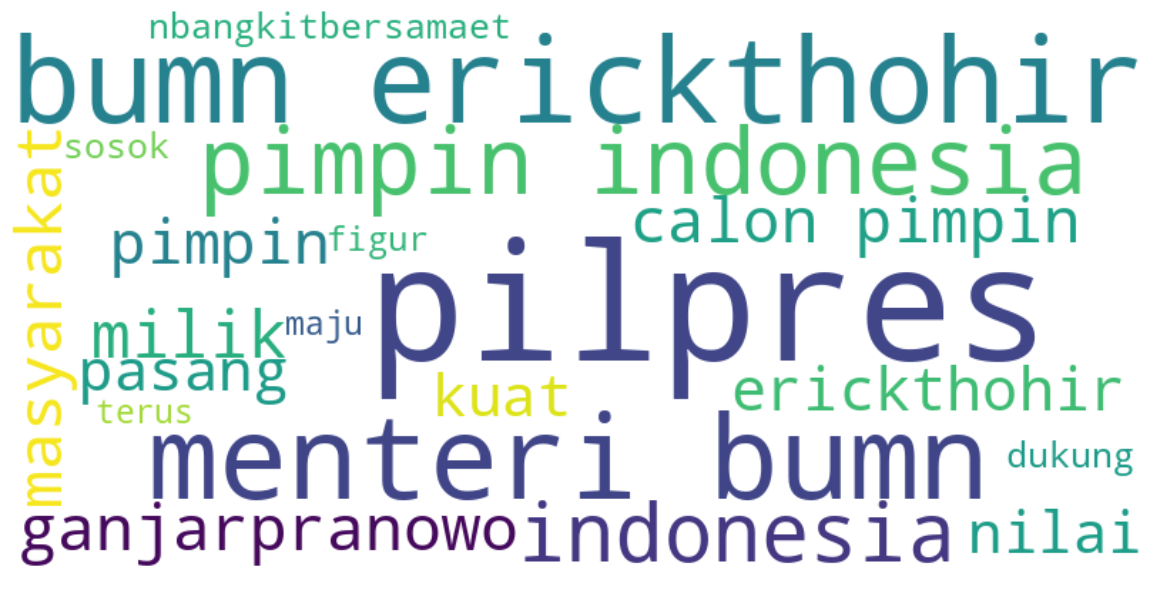

In [118]:
import pandas as pd
import numpy as np
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt


# Menggabungkan semua tweet menjadi satu string
data = ' '.join(cluster_12['full_text'].tolist())

# Menghilangkan kata-kata yang tidak diinginkan
stopwords = set(STOPWORDS)
stopwords.update(['https', 'co', 'RT', '...', 'amp'])

# Membuat objek WordCloud
wc = WordCloud(stopwords=stopwords, background_color="white", max_words=20, width=800, height=400)

# Menghasilkan WordCloud dari string tweet
wc.generate(data)

# Menampilkan WordCloud
plt.figure(figsize=(12, 6))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.tight_layout()

# Simpan WordCloud ke file PNG dengan kualitas tinggi
plt.savefig('wordcloud12.png', dpi=300)

# Tampilkan WordCloud
plt.show()

# ***C-13***

In [119]:
import pandas as pd

# Memuat data dari file CSV
cluster_13 = pd.read_csv('cluster_13.csv')

# Menampilkan beberapa baris pertama dari DataFrame
cluster_13.head(4)

full_text  Cluster
0  menteri bumn erick thohir figur cawapres elekt...       13
1  menteri bumn erick thohir figur cawapres dgn e...       13
2  amat politik perfekto indonesia amir faisal me...       13
3  menteri bumn erickthohir figur calon wakil pre...       13

In [120]:
cluster_13.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65 entries, 0 to 64
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   full_text  65 non-null     object
 1   Cluster    65 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.1+ KB


In [121]:
#Working with the most Frequent Words:
from collections import Counter
cnt = Counter()
for text in cluster_13["full_text"].values:
    for word in text.split():
        cnt[word] += 1
cnt.most_common(10)
temp = pd.DataFrame(cnt.most_common(10))
temp.columns=['word', 'count']
temp

word  count
0      menteri     82
1         bumn     67
2      pilpres     67
3        erick     57
4    indonesia     57
5     cawapres     56
6       thohir     52
7     presiden     50
8  erickthohir     30
9        pilih     28

In [122]:
import matplotlib.pyplot as plt
import plotly.express as px

# Mengurutkan data berdasarkan nilai count secara descending
temp_sorted = temp.sort_values(by='count', ascending=False)

# Membuat plot menggunakan data yang telah diurutkan
fig = px.bar(temp_sorted, x="count", y="word", title='Jumlah Kata Tweet Yang Sering Muncul', orientation='h', width=800, height=700)

# Membalikkan urutan sumbu y
fig.update_yaxes(autorange="reversed")

# Menampilkan plot
fig.show()

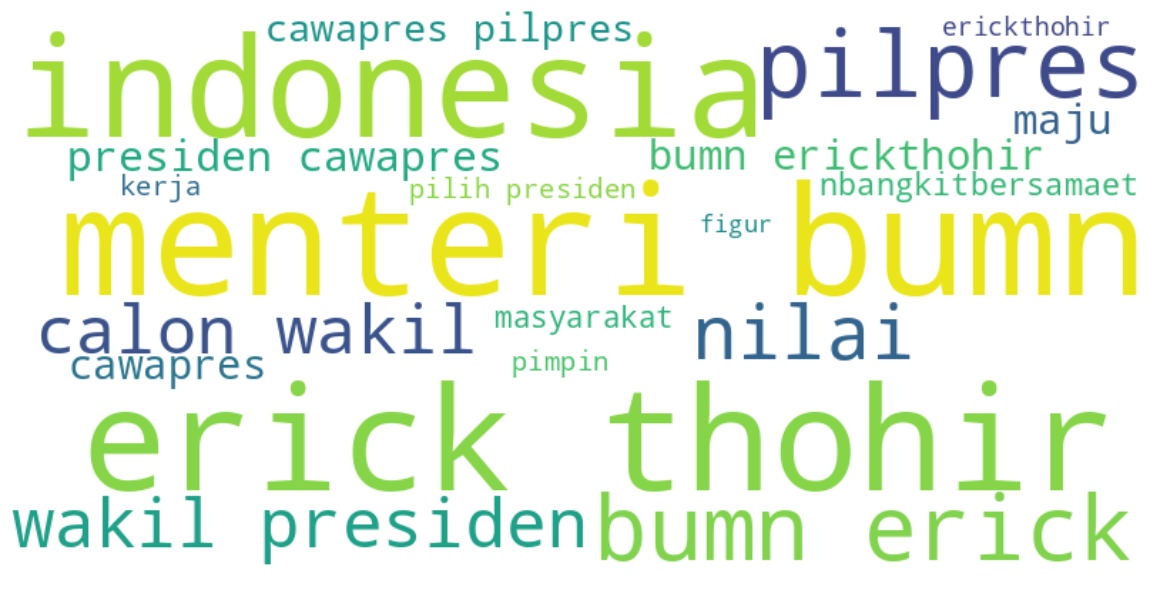

In [123]:
import pandas as pd
import numpy as np
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt


# Menggabungkan semua tweet menjadi satu string
data = ' '.join(cluster_13['full_text'].tolist())

# Menghilangkan kata-kata yang tidak diinginkan
stopwords = set(STOPWORDS)
stopwords.update(['https', 'co', 'RT', '...', 'amp'])

# Membuat objek WordCloud
wc = WordCloud(stopwords=stopwords, background_color="white", max_words=20, width=800, height=400)

# Menghasilkan WordCloud dari string tweet
wc.generate(data)

# Menampilkan WordCloud
plt.figure(figsize=(12, 6))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.tight_layout()

# Simpan WordCloud ke file PNG dengan kualitas tinggi
plt.savefig('wordcloud13.png', dpi=300)

# Tampilkan WordCloud
plt.show()

# ***C-14***

In [124]:
import pandas as pd

# Memuat data dari file CSV
cluster_14 = pd.read_csv('cluster_14.csv')

# Menampilkan beberapa baris pertama dari DataFrame
cluster_14.head(4)

full_text  Cluster
0  ganjaranapp ganjarpranowo dukung ganjar pranow...       14
1  mari satu barusan dukung ganjar pranowo pilpre...       14
2  ganjaranapp moga aja ganjar pranowo menang pil...       14
3  dukung penuh ppp ganjar pranowo maju capres ga...       14

In [125]:
cluster_14.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33 entries, 0 to 32
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   full_text  33 non-null     object
 1   Cluster    33 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 656.0+ bytes


In [126]:
#Working with the most Frequent Words:
from collections import Counter
cnt = Counter()
for text in cluster_14["full_text"].values:
    for word in text.split():
        cnt[word] += 1
cnt.most_common(10)
temp = pd.DataFrame(cnt.most_common(10))
temp.columns=['word', 'count']
temp

word  count
0         ganjar     52
1      indonesia     36
2        pilpres     34
3        pranowo     30
4    ganjaranapp     29
5  ganjarpranowo     22
6         pimpin     20
7         dukung     17
8           moga     17
9          sosok     16

In [127]:
import matplotlib.pyplot as plt
import plotly.express as px

# Mengurutkan data berdasarkan nilai count secara descending
temp_sorted = temp.sort_values(by='count', ascending=False)

# Membuat plot menggunakan data yang telah diurutkan
fig = px.bar(temp_sorted, x="count", y="word", title='Jumlah Kata Tweet Yang Sering Muncul', orientation='h', width=800, height=700)

# Membalikkan urutan sumbu y
fig.update_yaxes(autorange="reversed")

# Menampilkan plot
fig.show()

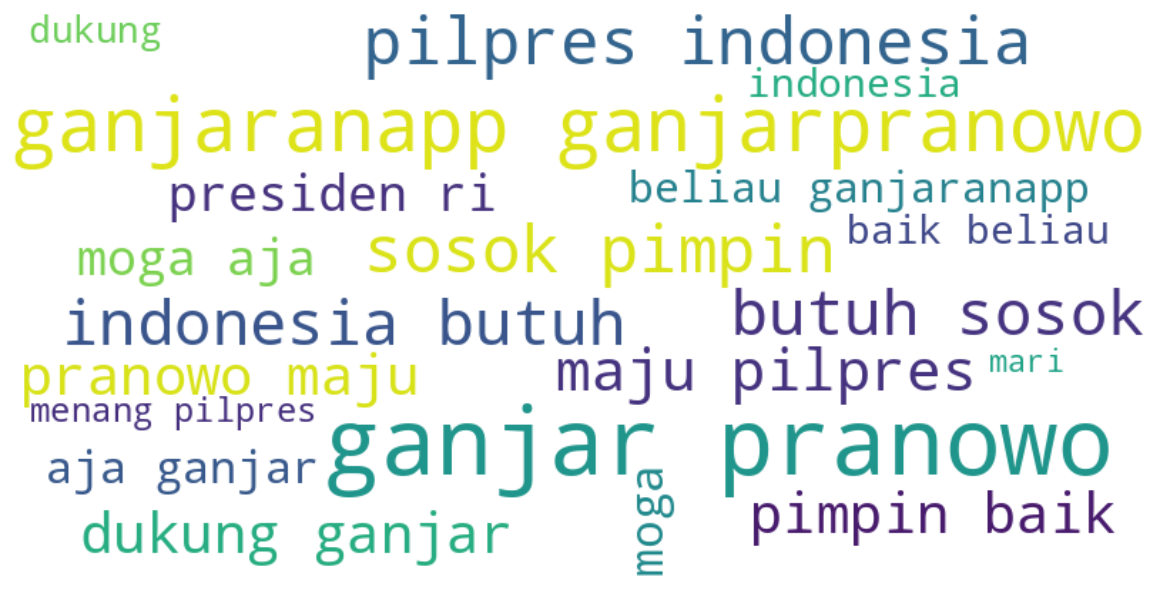

In [128]:
import pandas as pd
import numpy as np
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt


# Menggabungkan semua tweet menjadi satu string
data = ' '.join(cluster_14['full_text'].tolist())

# Menghilangkan kata-kata yang tidak diinginkan
stopwords = set(STOPWORDS)
stopwords.update(['https', 'co', 'RT', '...', 'amp'])

# Membuat objek WordCloud
wc = WordCloud(stopwords=stopwords, background_color="white", max_words=20, width=800, height=400)

# Menghasilkan WordCloud dari string tweet
wc.generate(data)

# Menampilkan WordCloud
plt.figure(figsize=(12, 6))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.tight_layout()

# Simpan WordCloud ke file PNG dengan kualitas tinggi
plt.savefig('wordcloud14.png', dpi=300)

# Tampilkan WordCloud
plt.show()

# ***C-15***

In [129]:
import pandas as pd

# Memuat data dari file CSV
cluster_15 = pd.read_csv('cluster_15.csv')

# Menampilkan beberapa baris pertama dari DataFrame
cluster_15.head(4)

full_text  Cluster
0  kerozaok prabowo kalah pilpres rakyat indonesi...       15
1  dahnhitungan kuat basis nich prabowo cakiminow...       15
2  bahtiar bayang potensi pilih kalang anak muda ...       15
3                  ganjar anies prabowo capres pilih       15

In [130]:
cluster_15.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 107 entries, 0 to 106
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   full_text  107 non-null    object
 1   Cluster    107 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 1.8+ KB


In [131]:
#Working with the most Frequent Words:
from collections import Counter
cnt = Counter()
for text in cluster_15["full_text"].values:
    for word in text.split():
        cnt[word] += 1
cnt.most_common(10)
temp = pd.DataFrame(cnt.most_common(10))
temp.columns=['word', 'count']
temp

word  count
0    prabowo    145
1    pilpres    109
2  indonesia    102
3   subianto     67
4   presiden     53
5     dukung     28
6      pilih     27
7     ganjar     26
8  ikutpakde     23
9     menang     20

In [132]:
import matplotlib.pyplot as plt
import plotly.express as px

# Mengurutkan data berdasarkan nilai count secara descending
temp_sorted = temp.sort_values(by='count', ascending=False)

# Membuat plot menggunakan data yang telah diurutkan
fig = px.bar(temp_sorted, x="count", y="word", title='Jumlah Kata Tweet Yang Sering Muncul', orientation='h', width=800, height=700)

# Membalikkan urutan sumbu y
fig.update_yaxes(autorange="reversed")

# Menampilkan plot
fig.show()

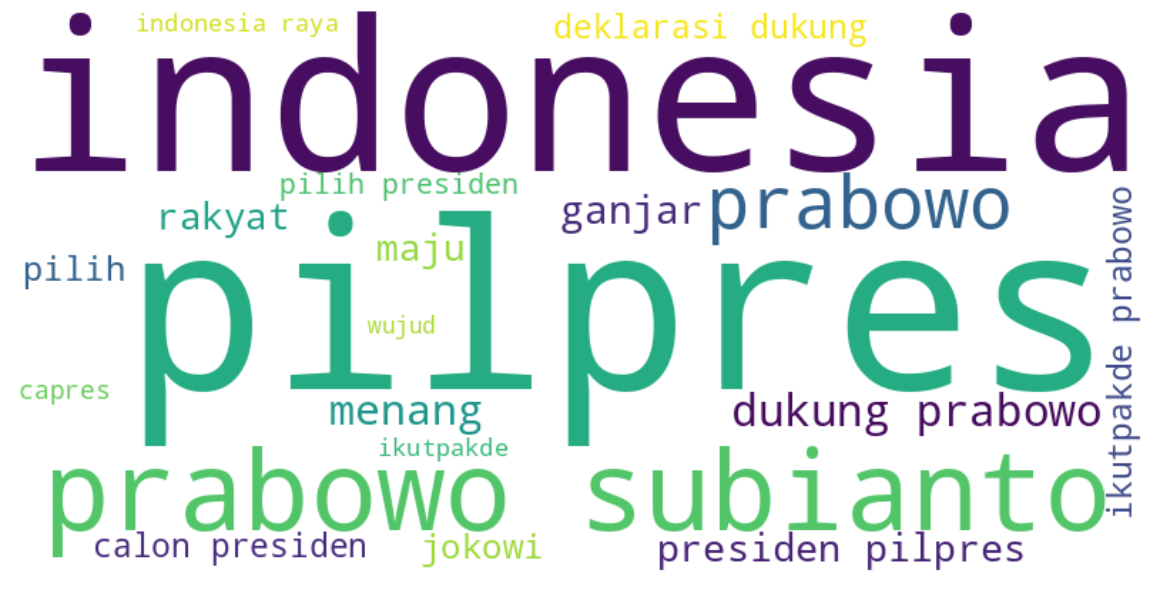

In [133]:
import pandas as pd
import numpy as np
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt


# Menggabungkan semua tweet menjadi satu string
data = ' '.join(cluster_15['full_text'].tolist())

# Menghilangkan kata-kata yang tidak diinginkan
stopwords = set(STOPWORDS)
stopwords.update(['https', 'co', 'RT', '...', 'amp'])

# Membuat objek WordCloud
wc = WordCloud(stopwords=stopwords, background_color="white", max_words=20, width=800, height=400)

# Menghasilkan WordCloud dari string tweet
wc.generate(data)

# Menampilkan WordCloud
plt.figure(figsize=(12, 6))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.tight_layout()

# Simpan WordCloud ke file PNG dengan kualitas tinggi
plt.savefig('wordcloud15.png', dpi=300)

# Tampilkan WordCloud
plt.show()

# ***C-16***

In [134]:
import pandas as pd

# Memuat data dari file CSV
cluster_16 = pd.read_csv('cluster_16.csv')

# Menampilkan beberapa baris pertama dari DataFrame
cluster_16.head(4)

full_text  Cluster
0  mas et dongkrak elektabilitas pasang capresnya...       16
1  hasil lembaga survei menunjukn elektabilitas g...       16
2  poltracking indonesia survei simulasi nama kan...       16
3  lembaga survei poltracking indonesia ukur ting...       16

In [135]:
cluster_16.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76 entries, 0 to 75
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   full_text  76 non-null     object
 1   Cluster    76 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.3+ KB


In [136]:
#Working with the most Frequent Words:
from collections import Counter
cnt = Counter()
for text in cluster_16["full_text"].values:
    for word in text.split():
        cnt[word] += 1
cnt.most_common(10)
temp = pd.DataFrame(cnt.most_common(10))
temp.columns=['word', 'count']
temp

word  count
0     survei    114
1    pilpres     78
2  indonesia     75
3      hasil     59
4    lembaga     45
5    prabowo     41
6   presiden     36
7   subianto     34
8     capres     28
9      calon     27

In [137]:
import matplotlib.pyplot as plt
import plotly.express as px

# Mengurutkan data berdasarkan nilai count secara descending
temp_sorted = temp.sort_values(by='count', ascending=False)

# Membuat plot menggunakan data yang telah diurutkan
fig = px.bar(temp_sorted, x="count", y="word", title='Jumlah Kata Tweet Yang Sering Muncul', orientation='h', width=800, height=700)

# Membalikkan urutan sumbu y
fig.update_yaxes(autorange="reversed")

# Menampilkan plot
fig.show()

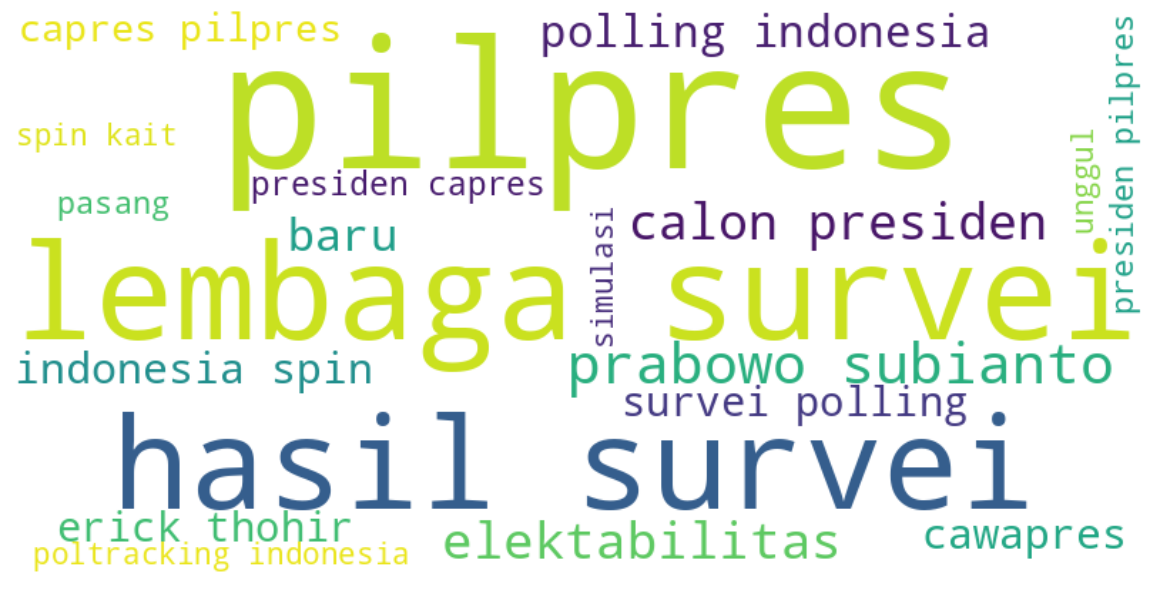

In [138]:
import pandas as pd
import numpy as np
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt


# Menggabungkan semua tweet menjadi satu string
data = ' '.join(cluster_16['full_text'].tolist())

# Menghilangkan kata-kata yang tidak diinginkan
stopwords = set(STOPWORDS)
stopwords.update(['https', 'co', 'RT', '...', 'amp'])

# Membuat objek WordCloud
wc = WordCloud(stopwords=stopwords, background_color="white", max_words=20, width=800, height=400)

# Menghasilkan WordCloud dari string tweet
wc.generate(data)

# Menampilkan WordCloud
plt.figure(figsize=(12, 6))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.tight_layout()

# Simpan WordCloud ke file PNG dengan kualitas tinggi
plt.savefig('wordcloud16.png', dpi=300)

# Tampilkan WordCloud
plt.show()

# ***C-17***

In [139]:
import pandas as pd

# Memuat data dari file CSV
cluster_17 = pd.read_csv('cluster_17.csv')

# Menampilkan beberapa baris pertama dari DataFrame
cluster_17.head(4)

full_text  Cluster
0  ahy peluang cawapres anies baswedan menang pil...       17
1  hasil survei ahy peluang damping anies pd pilp...       17
2  mahasiswa sulesi harap aniesahy pasang utk pil...       17
3  ahy harap rakyat aniesahy paslon baik pilpres ...       17

In [140]:
cluster_17.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47 entries, 0 to 46
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   full_text  47 non-null     object
 1   Cluster    47 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 880.0+ bytes


In [141]:
#Working with the most Frequent Words:
from collections import Counter
cnt = Counter()
for text in cluster_17["full_text"].values:
    for word in text.split():
        cnt[word] += 1
cnt.most_common(10)
temp = pd.DataFrame(cnt.most_common(10))
temp.columns=['word', 'count']
temp

word  count
0                 pilpres     47
1               jatengspn     47
2                    ahyn     43
3      ndemokratspnpidato     41
4                aniesahy     33
5  indonesianpatidemokrat     24
6           indonesianahy     23
7                  pimpin     23
8                    ubah     23
9                     ahy     15

In [142]:
import matplotlib.pyplot as plt
import plotly.express as px

# Mengurutkan data berdasarkan nilai count secara descending
temp_sorted = temp.sort_values(by='count', ascending=False)

# Membuat plot menggunakan data yang telah diurutkan
fig = px.bar(temp_sorted, x="count", y="word", title='Jumlah Kata Tweet Yang Sering Muncul', orientation='h', width=800, height=700)

# Membalikkan urutan sumbu y
fig.update_yaxes(autorange="reversed")

# Menampilkan plot
fig.show()

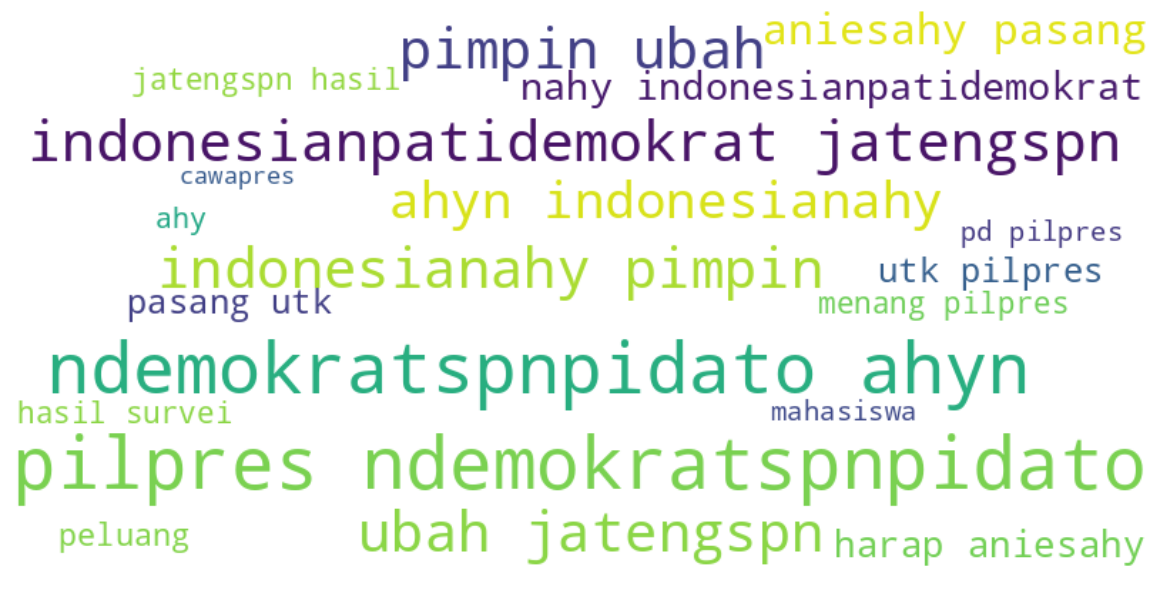

In [143]:
import pandas as pd
import numpy as np
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt


# Menggabungkan semua tweet menjadi satu string
data = ' '.join(cluster_17['full_text'].tolist())

# Menghilangkan kata-kata yang tidak diinginkan
stopwords = set(STOPWORDS)
stopwords.update(['https', 'co', 'RT', '...', 'amp'])

# Membuat objek WordCloud
wc = WordCloud(stopwords=stopwords, background_color="white", max_words=20, width=800, height=400)

# Menghasilkan WordCloud dari string tweet
wc.generate(data)

# Menampilkan WordCloud
plt.figure(figsize=(12, 6))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.tight_layout()

# Simpan WordCloud ke file PNG dengan kualitas tinggi
plt.savefig('wordcloud17.png', dpi=300)

# Tampilkan WordCloud
plt.show()

# ***C-18***

In [144]:
import pandas as pd

# Memuat data dari file CSV
cluster_18 = pd.read_csv('cluster_18.csv')

# Menampilkan beberapa baris pertama dari DataFrame
cluster_18.head(4)

full_text  Cluster
0  catar nnjangan suara pilpres politis partai ga...       18
1  tita ganjarpranowo cinta sepak bola indonesia ...       18
2  dennysiregar lupa jgn lupau gagal main indones...       18
3  dennyindrayana jokowi gagal negarawan sikap ad...       18

In [145]:
cluster_18.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76 entries, 0 to 75
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   full_text  76 non-null     object
 1   Cluster    76 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.3+ KB


In [146]:
#Working with the most Frequent Words:
from collections import Counter
cnt = Counter()
for text in cluster_18["full_text"].values:
    for word in text.split():
        cnt[word] += 1
cnt.most_common(10)
temp = pd.DataFrame(cnt.most_common(10))
temp.columns=['word', 'count']
temp

word  count
0      indonesia     81
1        pilpres     73
2              u     43
3          dunia     41
4          piala     33
5          batal     30
6         israel     23
7           tuan     22
8          rumah     22
9  ganjarpranowo     18

In [147]:
import matplotlib.pyplot as plt
import plotly.express as px

# Mengurutkan data berdasarkan nilai count secara descending
temp_sorted = temp.sort_values(by='count', ascending=False)

# Membuat plot menggunakan data yang telah diurutkan
fig = px.bar(temp_sorted, x="count", y="word", title='Jumlah Kata Tweet Yang Sering Muncul', orientation='h', width=800, height=700)

# Membalikkan urutan sumbu y
fig.update_yaxes(autorange="reversed")

# Menampilkan plot
fig.show()

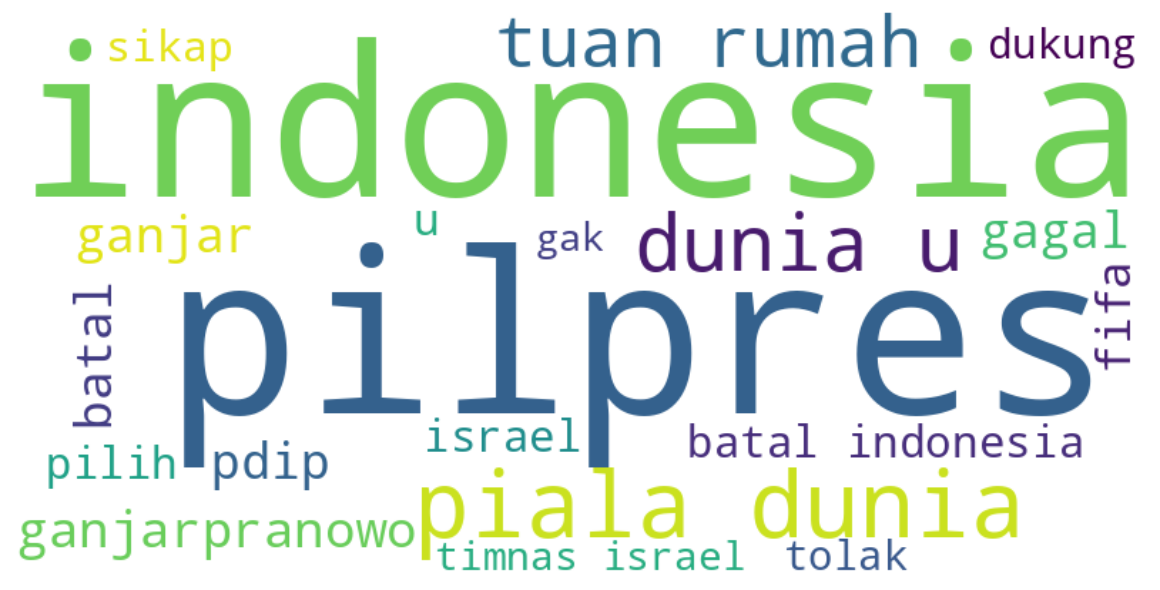

In [148]:
import pandas as pd
import numpy as np
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt


# Menggabungkan semua tweet menjadi satu string
data = ' '.join(cluster_18['full_text'].tolist())

# Menghilangkan kata-kata yang tidak diinginkan
stopwords = set(STOPWORDS)
stopwords.update(['https', 'co', 'RT', '...', 'amp'])

# Membuat objek WordCloud
wc = WordCloud(stopwords=stopwords, background_color="white", max_words=20, width=800, height=400)

# Menghasilkan WordCloud dari string tweet
wc.generate(data)

# Menampilkan WordCloud
plt.figure(figsize=(12, 6))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.tight_layout()

# Simpan WordCloud ke file PNG dengan kualitas tinggi
plt.savefig('wordcloud18.png', dpi=300)

# Tampilkan WordCloud
plt.show()

# ***C-19***

In [149]:
import pandas as pd

# Memuat data dari file CSV
cluster_19 = pd.read_csv('cluster_19.csv')

# Menampilkan beberapa baris pertama dari DataFrame
cluster_19.head(4)

full_text  Cluster
0  salah rakyat negeri harap doa moga pdip calon ...       19
1  arief poyuono ppkm cabut bukti hasil airlangga...       19
2  indonesia pilpres milu moana tiko curi raden s...       19
3  airlangga hartarto fokus menko perekonomiannni...       19

In [150]:
cluster_19.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   full_text  6 non-null      object
 1   Cluster    6 non-null      int64 
dtypes: int64(1), object(1)
memory usage: 224.0+ bytes


In [151]:
#Working with the most Frequent Words:
from collections import Counter
cnt = Counter()
for text in cluster_19["full_text"].values:
    for word in text.split():
        cnt[word] += 1
cnt.most_common(10)
temp = pd.DataFrame(cnt.most_common(10))
temp.columns=['word', 'count']
temp

word  count
0     love     12
1      you      7
2  pilpres      6
3     milu      5
4    moana      5
5     tiko      5
6     curi      5
7    raden      5
8    saleh      5
9       is      5

In [152]:
import matplotlib.pyplot as plt
import plotly.express as px

# Mengurutkan data berdasarkan nilai count secara descending
temp_sorted = temp.sort_values(by='count', ascending=False)

# Membuat plot menggunakan data yang telah diurutkan
fig = px.bar(temp_sorted, x="count", y="word", title='Jumlah Kata Tweet Yang Sering Muncul', orientation='h', width=800, height=700)

# Membalikkan urutan sumbu y
fig.update_yaxes(autorange="reversed")

# Menampilkan plot
fig.show()

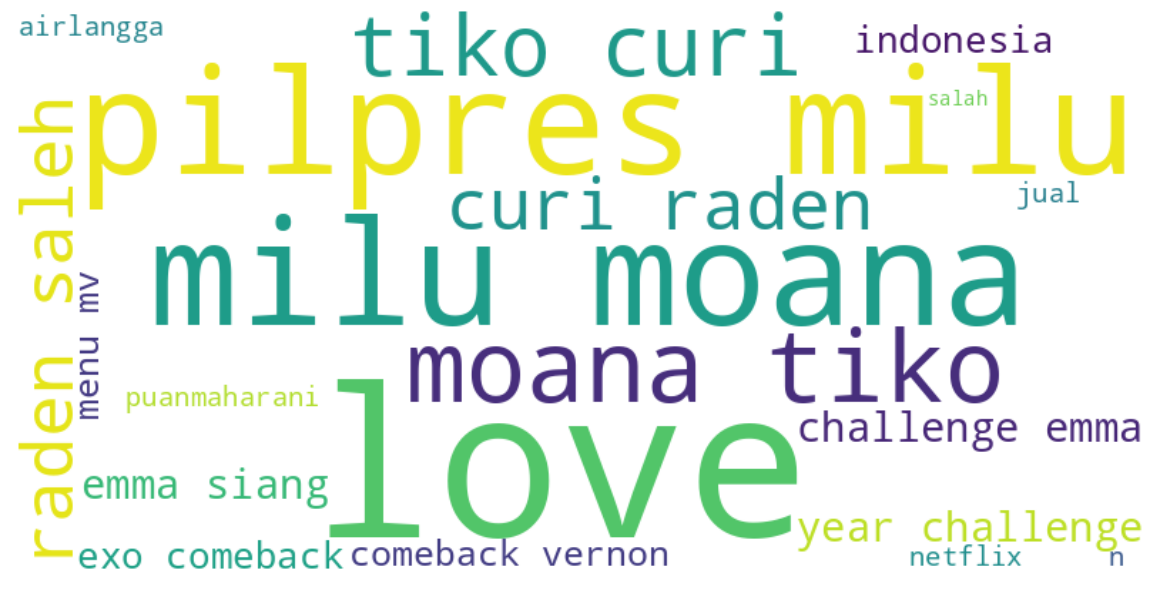

In [153]:
import pandas as pd
import numpy as np
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt


# Menggabungkan semua tweet menjadi satu string
data = ' '.join(cluster_19['full_text'].tolist())

# Menghilangkan kata-kata yang tidak diinginkan
stopwords = set(STOPWORDS)
stopwords.update(['https', 'co', 'RT', '...', 'amp'])

# Membuat objek WordCloud
wc = WordCloud(stopwords=stopwords, background_color="white", max_words=20, width=800, height=400)

# Menghasilkan WordCloud dari string tweet
wc.generate(data)

# Menampilkan WordCloud
plt.figure(figsize=(12, 6))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.tight_layout()

# Simpan WordCloud ke file PNG dengan kualitas tinggi
plt.savefig('wordcloud19.png', dpi=300)

# Tampilkan WordCloud
plt.show()